### Import dependency

In [430]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import math

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [431]:
X_train = pd.read_csv("DS Test/Training/X_train.csv")
Y_train = pd.read_csv("DS Test/Training/y_train.csv")

### Check information about data

In [432]:
X_train.head()

Unique_ID  C1  C2  C3  C4  C5     C6  C7    C8     N1  ...  N26  N27  \
0   Candidate_5926   1   0  11  31   0  False   0  True  23.75  ...  NaN  NaN   
1  Candidate_48134   1   4   2  66   2  False   1  True  11.05  ...  NaN  NaN   
2  Candidate_51717   1   0  19   2   0  False   0  True  29.00  ...  NaN  NaN   
3  Candidate_26401   1   1  16  47   1  False   4  True  17.99  ...  NaN  NaN   
4  Candidate_34872   1   1  13   1   1   True   6  True  27.50  ...  NaN  NaN   

   N28  N29  N30  N31  N32    N33     N34   N35  
0  NaN  NaN  NaN  NaN  NaN   58.0  113.39  12.0  
1  NaN  NaN  NaN  NaN  NaN  160.0  262.10  17.0  
2  NaN  NaN  NaN  NaN  NaN   24.0   50.29  18.0  
3  NaN  NaN  NaN  NaN  NaN   70.0  126.52  27.0  
4  NaN  NaN  NaN  NaN  NaN  100.0  205.47  21.0  

[5 rows x 44 columns]

In [433]:
X_train.shape

(33050, 44)

In [434]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  33050 non-null  object 
 1   C1         33050 non-null  int64  
 2   C2         33050 non-null  int64  
 3   C3         33050 non-null  int64  
 4   C4         33050 non-null  int64  
 5   C5         33050 non-null  int64  
 6   C6         33050 non-null  bool   
 7   C7         33050 non-null  int64  
 8   C8         33050 non-null  bool   
 9   N1         33050 non-null  float64
 10  N2         28438 non-null  float64
 11  N3         32685 non-null  float64
 12  N4         28444 non-null  float64
 13  N5         28444 non-null  float64
 14  N6         32685 non-null  float64
 15  N7         32623 non-null  float64
 16  N8         33050 non-null  int64  
 17  N9         33050 non-null  int64  
 18  N10        32623 non-null  float64
 19  N10.1      32623 non-null  float64
 20  N11   

In [435]:
Y_train.head()

Unique_ID  Dependent_Variable
0   Candidate_5926                   1
1  Candidate_48134                   0
2  Candidate_51717                   1
3  Candidate_26401                   0
4  Candidate_34872                   0

In [436]:
Y_train.shape

(33050, 2)

### Join two dataset

In [437]:
# jone the final data
data = pd.merge(X_train, Y_train, how='inner', on='Unique_ID')
data.head()

Unique_ID  C1  C2  C3  C4  C5     C6  C7    C8     N1  ...  N27  N28  \
0   Candidate_5926   1   0  11  31   0  False   0  True  23.75  ...  NaN  NaN   
1  Candidate_48134   1   4   2  66   2  False   1  True  11.05  ...  NaN  NaN   
2  Candidate_51717   1   0  19   2   0  False   0  True  29.00  ...  NaN  NaN   
3  Candidate_26401   1   1  16  47   1  False   4  True  17.99  ...  NaN  NaN   
4  Candidate_34872   1   1  13   1   1   True   6  True  27.50  ...  NaN  NaN   

   N29  N30  N31  N32    N33     N34   N35  Dependent_Variable  
0  NaN  NaN  NaN  NaN   58.0  113.39  12.0                   1  
1  NaN  NaN  NaN  NaN  160.0  262.10  17.0                   0  
2  NaN  NaN  NaN  NaN   24.0   50.29  18.0                   1  
3  NaN  NaN  NaN  NaN   70.0  126.52  27.0                   0  
4  NaN  NaN  NaN  NaN  100.0  205.47  21.0                   0  

[5 rows x 45 columns]

In [438]:
data.shape

(33050, 45)

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unique_ID           33050 non-null  object 
 1   C1                  33050 non-null  int64  
 2   C2                  33050 non-null  int64  
 3   C3                  33050 non-null  int64  
 4   C4                  33050 non-null  int64  
 5   C5                  33050 non-null  int64  
 6   C6                  33050 non-null  bool   
 7   C7                  33050 non-null  int64  
 8   C8                  33050 non-null  bool   
 9   N1                  33050 non-null  float64
 10  N2                  28438 non-null  float64
 11  N3                  32685 non-null  float64
 12  N4                  28444 non-null  float64
 13  N5                  28444 non-null  float64
 14  N6                  32685 non-null  float64
 15  N7                  32623 non-null  float64
 16  N8  

In [440]:
data.describe()

C1            C2            C3            C4            C5  \
count  33050.000000  33050.000000  33050.000000  33050.000000  33050.000000   
mean       1.119818      2.403873     12.856097     14.437398      1.719395   
std        0.399382      3.399024     12.013457     15.527474      1.320860   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      2.000000      1.000000      1.000000   
50%        1.000000      1.000000     10.000000     10.000000      2.000000   
75%        1.000000      3.000000     20.000000     26.000000      2.000000   
max        3.000000     20.000000     51.000000     67.000000      7.000000   

                 C7           N1            N2            N3            N4  \
count  33050.000000  33050.00000  28438.000000  32685.000000  28444.000000   
mean       3.124932     19.97653     81.342710      3.359361      9.574075   
std        2.158905      8.11087     85.397795      0.411040      5.584756   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%        1.000000     13.45000     21.000000      3.200000      6.000000   
50%        4.000000     19.27500     53.000000      3.400000      9.000000   
75%        4.000000     26.90000    112.000000      3.600000     13.000000   
max        7.000000     48.00000    755.000000      4.400000     59.000000   

       ...          N27          N28          N29           N30           N31  \
count  ...  6271.000000  6271.000000  6271.000000   6271.000000   6271.000000   
mean   ...    19.512199     0.526391     0.045288   7192.813526   2379.621620   
std    ...    15.637882     2.144069     0.443838   6460.139952   3379.065104   
min    ...     0.000000     0.000000     0.000000   1000.000000      0.000000   
25%    ...     9.000000     0.000000     0.000000   3000.000000      0.000000   
50%    ...    14.000000     0.000000     0.000000   5000.000000   1108.440000   
75%    ...    27.000000     0.000000     0.000000   9500.000000   3408.750000   
max    ...   111.000000    42.000000    11.000000  60001.000000  22586.670000   

               N32           N33           N34           N35  \
count  6220.000000  33050.000000  33050.000000  32623.000000   
mean      0.744373    125.629394    224.313536     19.587254   
std      50.764684    104.391919    186.513844      7.352667   
min    -194.000000     20.000000      0.000000      2.000000   
25%     -31.000000     54.000000     98.740000     14.000000   
50%       0.000000     90.000000    172.600000     19.000000   
75%      32.000000    160.000000    300.947500     24.000000   
max     257.000000    700.000000   2153.380000     64.000000   

       Dependent_Variable  
count        33050.000000  
mean             0.308805  
std              0.462007  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000  

[8 rows x 42 columns]

### Check null values and handle

In [441]:
# Calculate the percentage of null values for each column
null_percentage  = data.isna().sum().sort_values(ascending=False) / X_train.shape[0] * 100

# Filter columns where the null percentage is greater than 20%
columns_with_high_nulls = null_percentage[null_percentage > 10]

In [442]:
null_percentage

N32                   81.180030
N27                   81.025719
N31                   81.025719
N26                   81.025719
N29                   81.025719
N30                   81.025719
N28                   81.025719
N25                   81.025719
N12                   13.960666
N2                    13.954614
N4                    13.936460
N5                    13.936460
N18                   13.936460
N17                   13.936460
N16                   13.936460
N20                   13.830560
N21                   13.830560
N19                   13.830560
N22                   13.830560
N23                    7.521936
N11                    2.166415
N14                    1.839637
N10.1                  1.291982
N10                    1.291982
N15                    1.291982
N7                     1.291982
N35                    1.291982
N6                     1.104387
N3                     1.104387
N24                    0.000000
N33                    0.000000
N34     

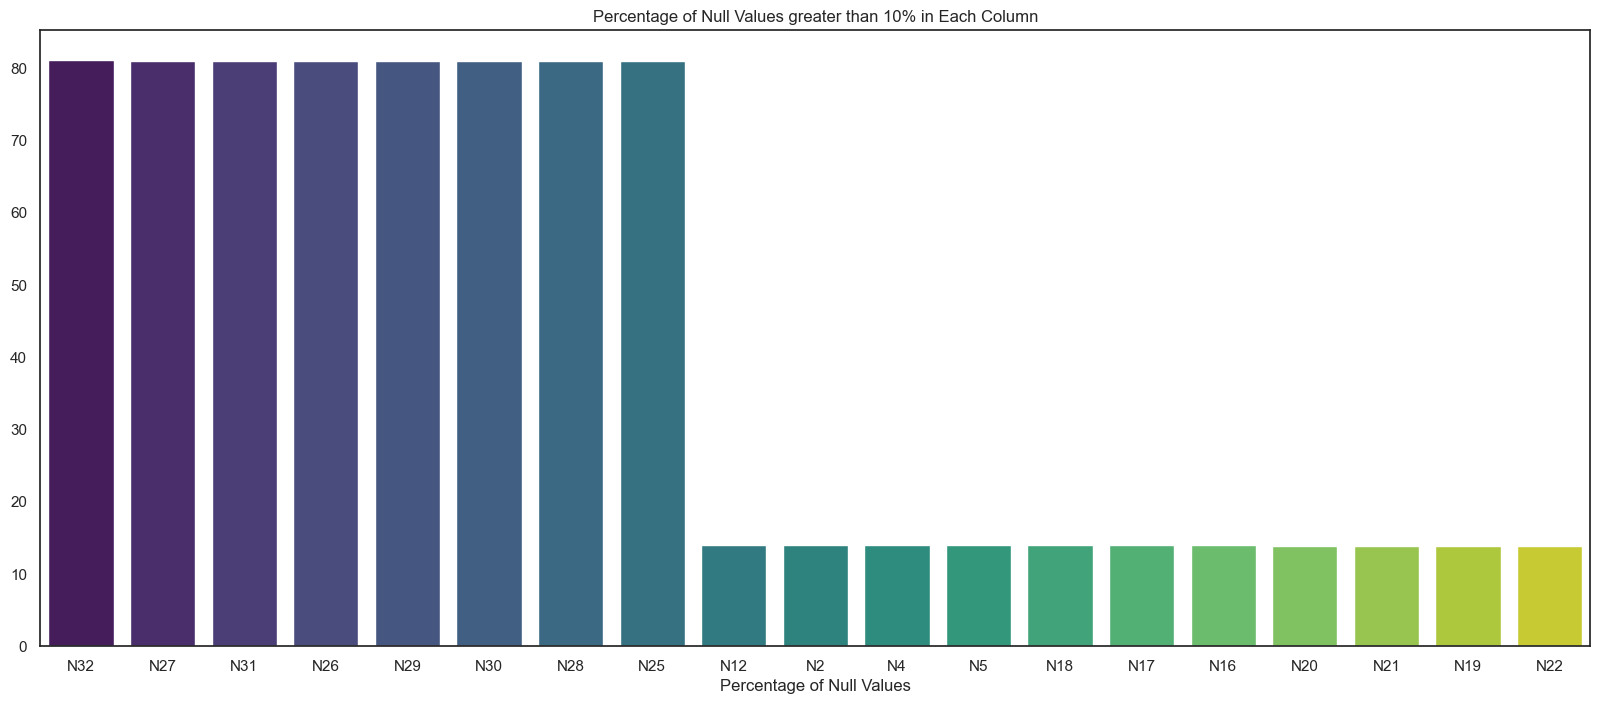

In [443]:
# Create a bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x=columns_with_high_nulls.index, y=columns_with_high_nulls, palette='viridis', orient='v')
plt.xlabel('Percentage of Null Values')
plt.title('Percentage of Null Values greater than 10% in Each Column')
plt.show()

In [444]:
len(columns_with_high_nulls.index), columns_with_high_nulls.values, columns_with_high_nulls.index

(19,
 array([81.18003026, 81.02571861, 81.02571861, 81.02571861, 81.02571861,
        81.02571861, 81.02571861, 81.02571861, 13.96066566, 13.95461422,
        13.93645991, 13.93645991, 13.93645991, 13.93645991, 13.93645991,
        13.83055976, 13.83055976, 13.83055976, 13.83055976]),
 Index(['N32', 'N27', 'N31', 'N26', 'N29', 'N30', 'N28', 'N25', 'N12', 'N2',
        'N4', 'N5', 'N18', 'N17', 'N16', 'N20', 'N21', 'N19', 'N22'],
       dtype='object'))

#### Remove column which have 80% or more null values


In [445]:
# Filter columns where the null percentage is greater than 20%
columns_with_more_than_80_per_null_values = null_percentage[null_percentage > 80]

In [446]:
df_filtered = data.drop(columns=columns_with_more_than_80_per_null_values.index)

In [447]:
df_filtered.shape

(33050, 37)

In [448]:
# Calculate the percentage of null values for each column
null_percentage  = df_filtered.isna().sum().sort_values(ascending=False) / df_filtered.shape[0] * 100

# Filter columns where the null percentage is greater than 5%
columns_with_high_nulls = null_percentage[null_percentage > 0.01]

In [408]:
columns_with_high_nulls

N12      13.960666
N2       13.954614
N4       13.936460
N17      13.936460
N16      13.936460
N5       13.936460
N18      13.936460
N19      13.830560
N22      13.830560
N21      13.830560
N20      13.830560
N23       7.521936
N11       2.166415
N14       1.839637
N10.1     1.291982
N10       1.291982
N7        1.291982
N35       1.291982
N15       1.291982
N6        1.104387
N3        1.104387
dtype: float64

### fill na values with median and mode

In [409]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unique_ID           33050 non-null  object 
 1   C1                  33050 non-null  int64  
 2   C2                  33050 non-null  int64  
 3   C3                  33050 non-null  int64  
 4   C4                  33050 non-null  int64  
 5   C5                  33050 non-null  int64  
 6   C6                  33050 non-null  bool   
 7   C7                  33050 non-null  int64  
 8   C8                  33050 non-null  bool   
 9   N1                  33050 non-null  float64
 10  N2                  28438 non-null  float64
 11  N3                  32685 non-null  float64
 12  N4                  28444 non-null  float64
 13  N5                  28444 non-null  float64
 14  N6                  32685 non-null  float64
 15  N7                  32623 non-null  float64
 16  N8  

In [417]:
df_filtered.head()

Unique_ID  C1  C2  C3  C4  C5     C6  C7    C8     N1  ...      N19  \
0   Candidate_5926   1   0  11  31   0  False   0  True  23.75  ...      NaN   
1  Candidate_48134   1   4   2  66   2  False   1  True  11.05  ...  25856.0   
2  Candidate_51717   1   0  19   2   0  False   0  True  29.00  ...      NaN   
3  Candidate_26401   1   1  16  47   1  False   4  True  17.99  ...   1006.0   
4  Candidate_34872   1   1  13   1   1   True   6  True  27.50  ...   3398.0   

    N20   N21  N22     N23           N24    N33     N34   N35  \
0   NaN   NaN  NaN  27.816   1750.000000   58.0  113.39  12.0   
1  17.0  0.88  1.0  40.000  10833.333330  160.0  262.10  17.0   
2   NaN   NaN  NaN  20.000   6250.000000   24.0   50.29  18.0   
3   6.0  1.00  0.0  26.000   2413.666667   70.0  126.52  27.0   
4  31.0  0.96  0.0  44.000   7666.666667  100.0  205.47  21.0   

   Dependent_Variable  
0                   1  
1                   0  
2                   1  
3                   0  
4                   0  

[5 rows x 37 columns]

In [426]:
# Identify categorical and numeric columns
categorical_columns = ['C1', 'C2', 'C3', 'C4','C6','C8','C5', 'C7']
mode_values = {}  # Create an empty dictionary to store mode values

for column in categorical_columns:
    mode_value = df_filtered[column].mode()[0]  # Calculate the mode for the current column
    df_filtered[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode
    mode_values[column] = mode_value  # Store the mode value in the dictionary

# Now, 'mode_values' contains the mode values for each categorical column
print(mode_values)

{'C1': 1, 'C2': 1, 'C3': 2, 'C4': 1, 'C6': False, 'C8': True, 'C5': 2, 'C7': 4}


In [427]:
# Replace missing values in numerical columns with median
numerical_columns = df_filtered.filter(regex='^N', axis=1)
median_values = {}

for column in numerical_columns:
    median_value = df_filtered[column].median()
    df_filtered[column].fillna(median_value, inplace=True)
    median_values[column] = median_value

# 'median_values' contains the median values for each numeric column
print(median_values)

{'N1': 19.275, 'N2': 53.0, 'N3': 3.4, 'N4': 9.0, 'N5': 8.0, 'N6': 3.495, 'N7': 23.0, 'N8': 5.0, 'N9': 183.0, 'N10': 0.0, 'N10.1': 1.0, 'N11': 5.0, 'N12': 0.0, 'N14': 0.0, 'N15': 0.0, 'N16': 0.0, 'N17': 6073.0, 'N18': 0.56, 'N19': 3352.0, 'N20': 20.0, 'N21': 0.92, 'N22': 1.0, 'N23': 40.0, 'N24': 4166.666667, 'N33': 90.0, 'N34': 172.6, 'N35': 19.0}


In [428]:
# Calculate the null values for each column
df_filtered.isna().sum().sort_values(ascending=False)

Unique_ID             0
N10.1                 0
N12                   0
N14                   0
N15                   0
N16                   0
N17                   0
N18                   0
N19                   0
N20                   0
N21                   0
N22                   0
N23                   0
N24                   0
N33                   0
N34                   0
N35                   0
N11                   0
N10                   0
C1                    0
N9                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
N1                    0
N2                    0
N3                    0
N4                    0
N5                    0
N6                    0
N7                    0
N8                    0
Dependent_Variable    0
dtype: int64

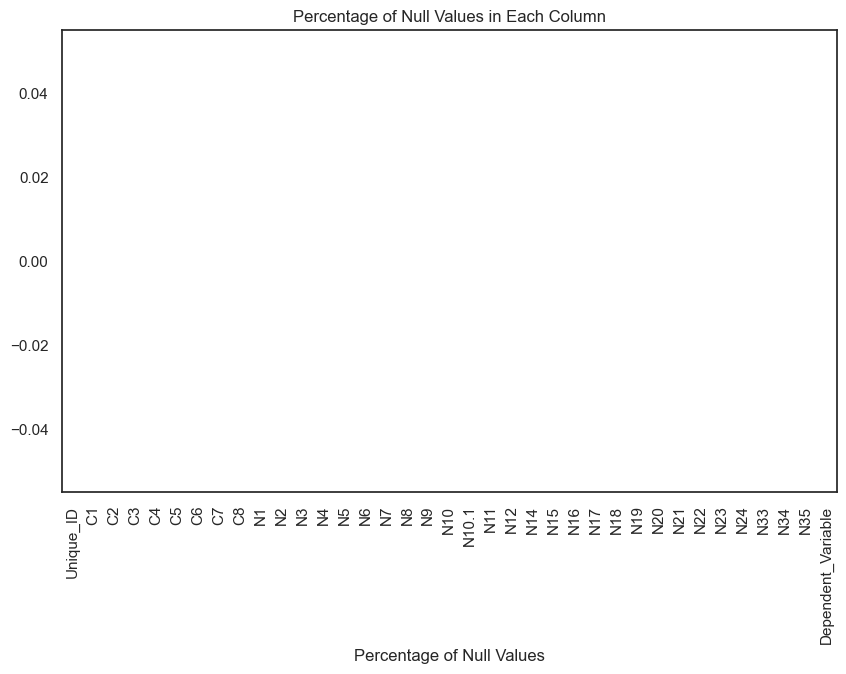

In [429]:
# Calculate the percentage of null values for each column
null_percentage = (df_filtered.isnull().sum() / len(df_filtered)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette='viridis')
plt.xlabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Check Distribution of the dataset

In [30]:
df_filtered

Unique_ID  C1  C2  C3  C4  C5     C6  C7    C8     N1  ...  \
0       Candidate_5926   1   0  11  31   0  False   0  True  23.75  ...   
1      Candidate_48134   1   4   2  66   2  False   1  True  11.05  ...   
2      Candidate_51717   1   0  19   2   0  False   0  True  29.00  ...   
3      Candidate_26401   1   1  16  47   1  False   4  True  17.99  ...   
4      Candidate_34872   1   1  13   1   1   True   6  True  27.50  ...   
...                ...  ..  ..  ..  ..  ..    ...  ..   ...    ...  ...   
33045  Candidate_26099   1   1  14  41   2  False   6  True  15.50  ...   
33046  Candidate_33316   1   6  10   1   2   True   2  True  32.20  ...   
33047  Candidate_36027   1   1   2   4   2  False   6  True   8.99  ...   
33048   Candidate_3169   1   0   0   0   0  False   0  True  15.00  ...   
33049   Candidate_4714   1   6   8  14   1  False   4  True  26.99  ...   

                N19        N20       N21       N22     N23           N24  \
0      11037.365322  21.764142  0.857199  0.906422  27.816   1750.000000   
1      25856.000000  17.000000  0.880000  1.000000  40.000  10833.333330   
2      11037.365322  21.764142  0.857199  0.906422  20.000   6250.000000   
3       1006.000000   6.000000  1.000000  0.000000  26.000   2413.666667   
4       3398.000000  31.000000  0.960000  0.000000  44.000   7666.666667   
...             ...        ...       ...       ...     ...           ...   
33045   7661.000000   7.000000  1.000000  0.000000  18.000   7000.000000   
33046    868.000000  41.000000  0.630000  2.000000  42.000   4420.000000   
33047  20105.000000  28.000000  0.750000  0.000000  18.000   6971.833333   
33048  11037.365322  21.764142  0.857199  0.906422  40.000   2537.916667   
33049    326.000000   3.000000  1.000000  0.000000  18.000   2500.000000   

          N33     N34   N35  Dependent_Variable  
0       58.00  113.39  12.0                   1  
1      160.00  262.10  17.0                   0  
2       24.00   50.29  18.0                   1  
3       70.00  126.52  27.0                   0  
4      100.00  205.47  21.0                   0  
...       ...     ...   ...                 ...  
33045  199.98  349.07   8.0                   0  
33046   40.00   87.33  19.0                   0  
33047   40.00   63.59  20.0                   0  
33048   24.00   41.60  17.0                   1  
33049  100.00  204.10  11.0                   1  

[33050 rows x 37 columns]

In [31]:
# Create a list of numerical column names
numerical_columns = df_filtered.select_dtypes(include='number').columns
numerical_columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16',
       'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N33', 'N34',
       'N35', 'Dependent_Variable'],
      dtype='object')

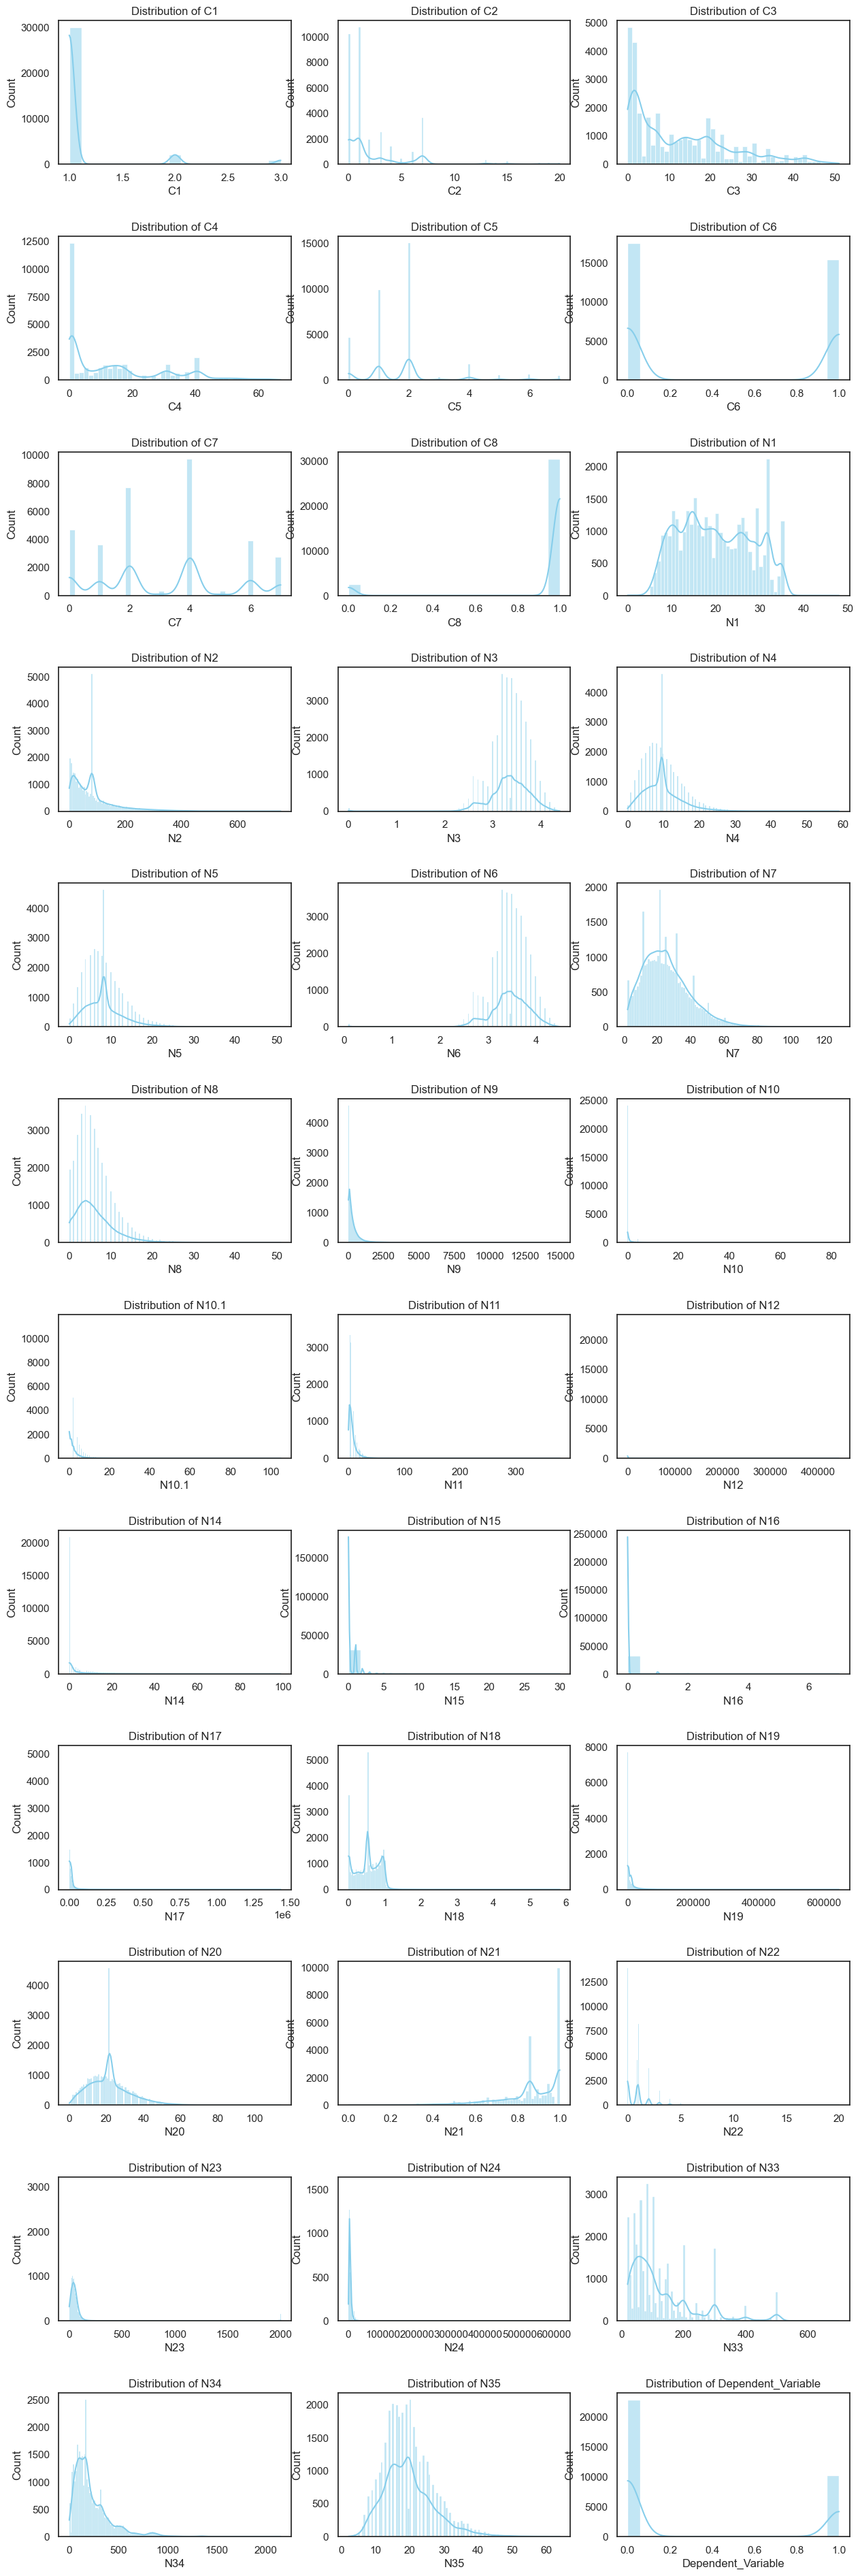

In [367]:
# Create a list of numerical column names
numerical_columns = df_filtered.select_dtypes(include='number').columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3  # Set the number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    
    # Create histogram with KDE for the current numerical column
    sns.histplot(df_filtered[column], kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)

# If there are empty subplots, remove them
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.show()

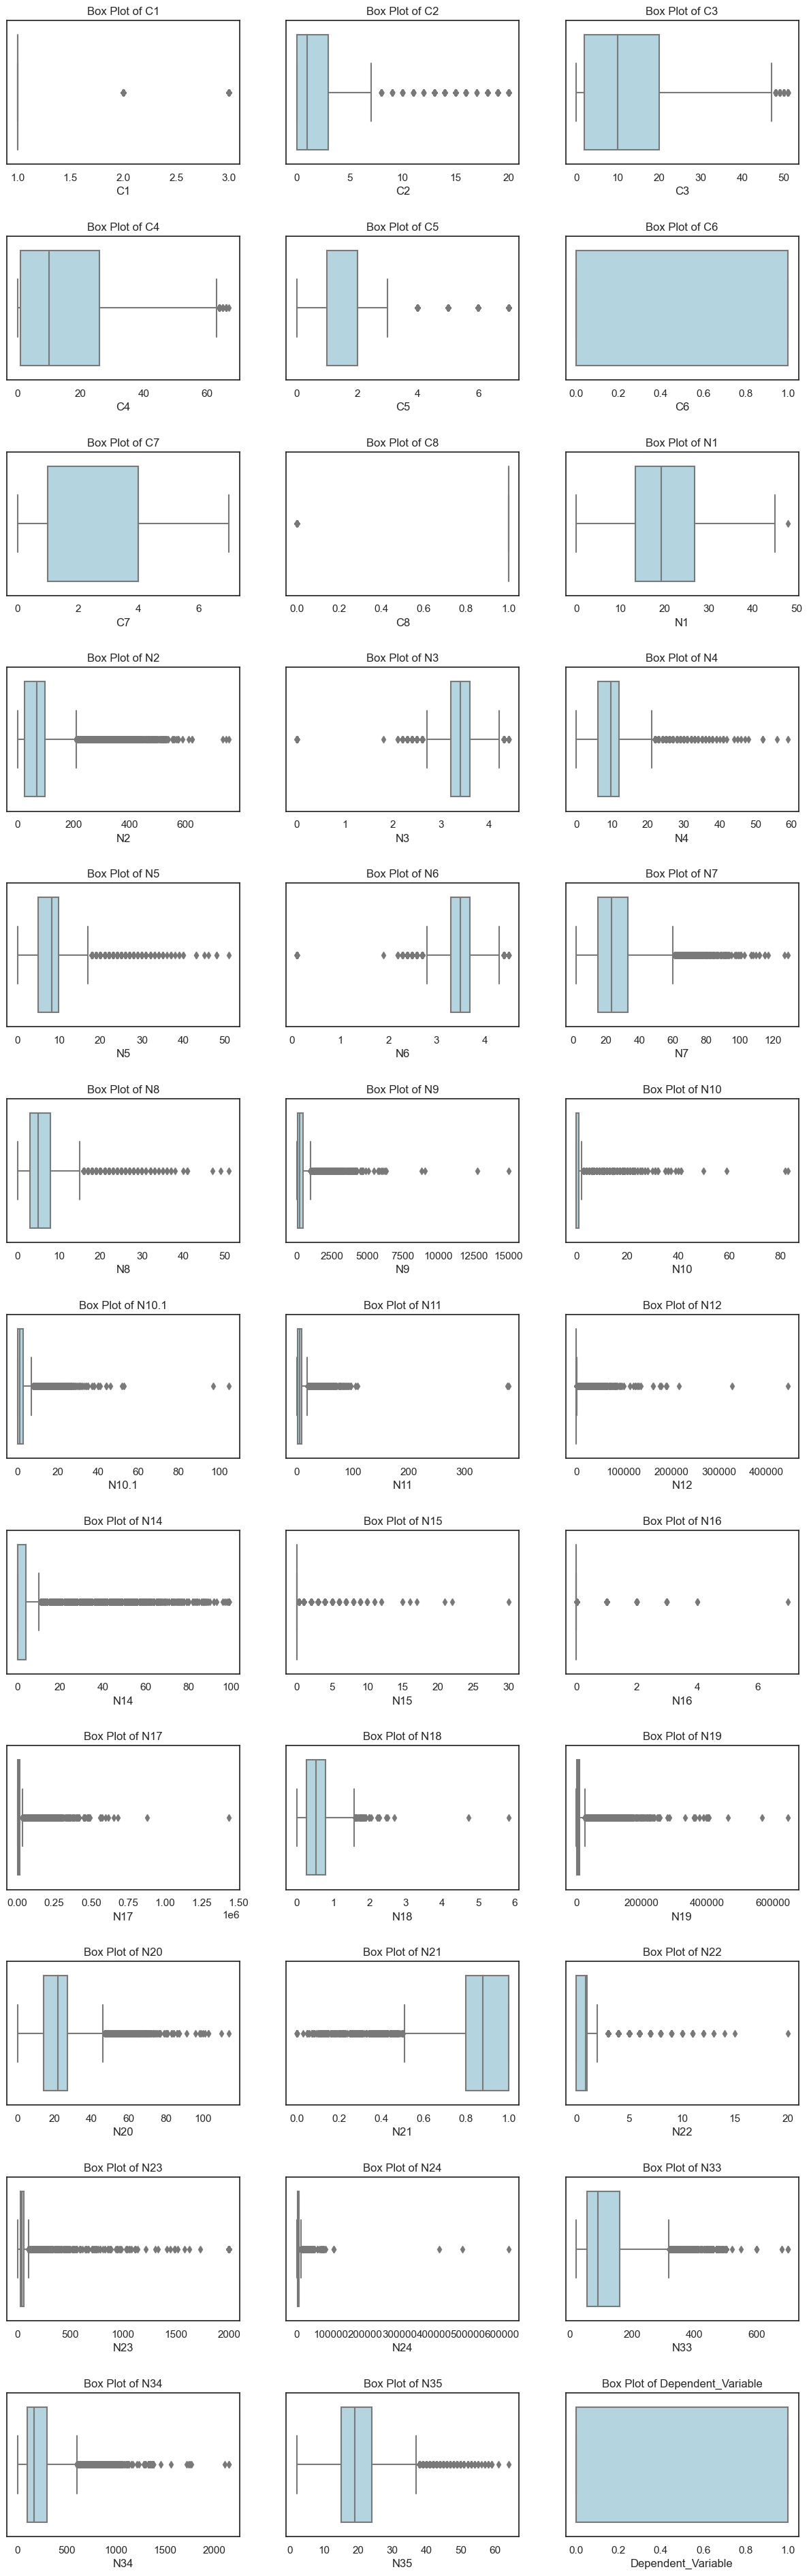

In [365]:
# Create a list of numerical column names
numerical_columns = df_filtered.select_dtypes(include='number').columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3  # Set the number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    
    # Create box plot for the current numerical column
    sns.boxplot(x=df_filtered[column], color='lightblue', ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')
    axes[row, col].set_xlabel(column)

# If there are empty subplots, remove them
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.show()


In [34]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unique_ID           33050 non-null  object 
 1   C1                  33050 non-null  int64  
 2   C2                  33050 non-null  int64  
 3   C3                  33050 non-null  int64  
 4   C4                  33050 non-null  int64  
 5   C5                  33050 non-null  int64  
 6   C6                  33050 non-null  bool   
 7   C7                  33050 non-null  int64  
 8   C8                  33050 non-null  bool   
 9   N1                  33050 non-null  float64
 10  N2                  33050 non-null  float64
 11  N3                  33050 non-null  float64
 12  N4                  33050 non-null  float64
 13  N5                  33050 non-null  float64
 14  N6                  33050 non-null  float64
 15  N7                  33050 non-null  float64
 16  N8  

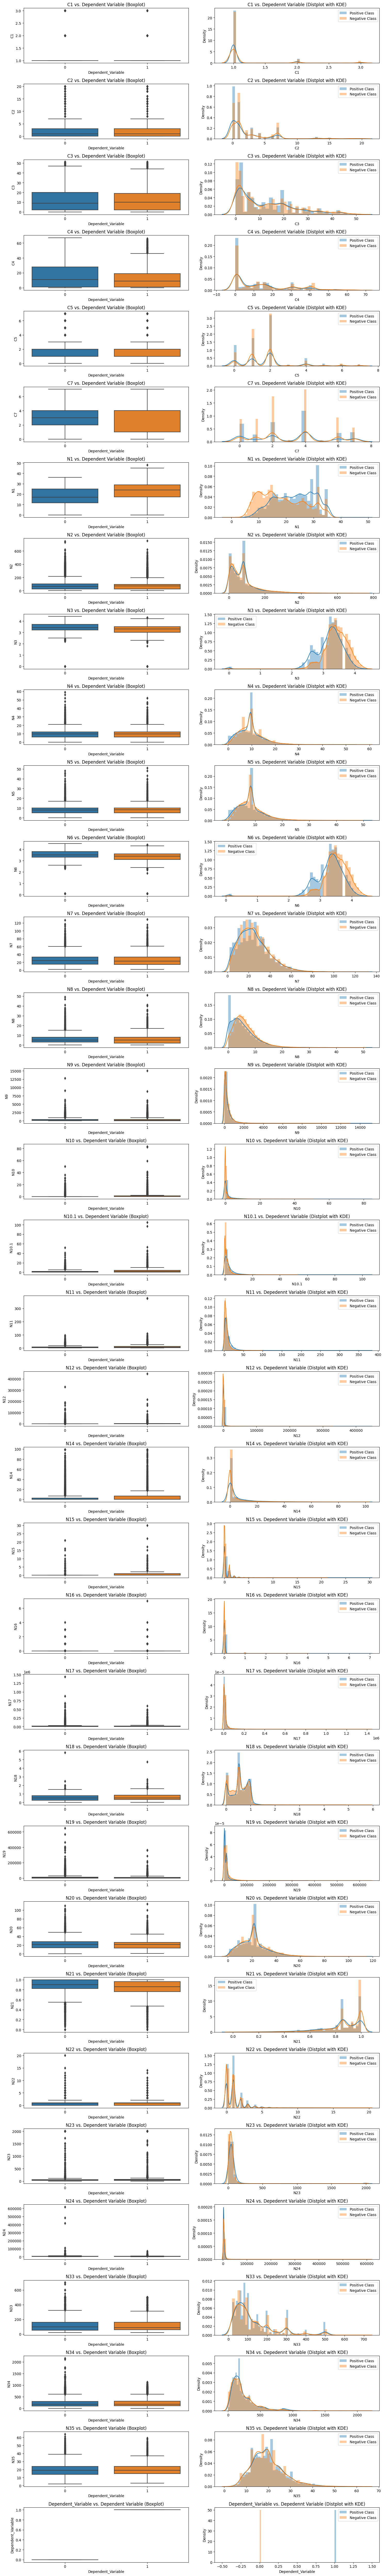

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to compare
# Create a list of numerical column names
features = df_filtered.select_dtypes(include='number').columns

# Create a single plot with subplots
fig, axes = plt.subplots(len(features), 2, figsize=(15, 100))

# Loop through each feature and create boxplots and dist plots
for i, feature in enumerate(features):
    # Create boxplots
    sns.boxplot(x='Dependent_Variable', y=feature, data=df_filtered, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} vs. Dependent Variable (Boxplot)')

    # Create dist plots with KDE
    sns.distplot(df_filtered[df_filtered['Dependent_Variable'] == 1][feature], label='Positive Class', ax=axes[i, 1])
    sns.distplot(df_filtered[df_filtered['Dependent_Variable'] == 0][feature], label='Negative Class', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs. Depedennt Variable (Distplot with KDE)')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


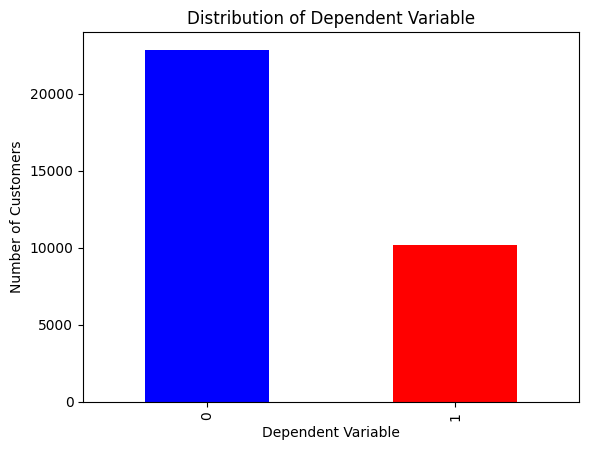

In [36]:
# Count the number of customers in each class (Stayed and Left)
dependent_val_count = data['Dependent_Variable'].value_counts()

# Create a bar plot to visualize the class distribution
dependent_val_count.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Dependent Variable')
plt.ylabel('Number of Customers')
plt.title('Distribution of Dependent Variable')

# Show the plot
plt.show()

In [37]:
data['Dependent_Variable'].value_counts()

Dependent_Variable
0    22844
1    10206
Name: count, dtype: int64

### Prepare the data for machine learning by encoding categorical variables and splitting it into training and testing sets.

In [38]:
df_filtered.head()

Unique_ID  C1  C2  C3  C4  C5     C6  C7    C8     N1  ...  \
0   Candidate_5926   1   0  11  31   0  False   0  True  23.75  ...   
1  Candidate_48134   1   4   2  66   2  False   1  True  11.05  ...   
2  Candidate_51717   1   0  19   2   0  False   0  True  29.00  ...   
3  Candidate_26401   1   1  16  47   1  False   4  True  17.99  ...   
4  Candidate_34872   1   1  13   1   1   True   6  True  27.50  ...   

            N19        N20       N21       N22     N23           N24    N33  \
0  11037.365322  21.764142  0.857199  0.906422  27.816   1750.000000   58.0   
1  25856.000000  17.000000  0.880000  1.000000  40.000  10833.333330  160.0   
2  11037.365322  21.764142  0.857199  0.906422  20.000   6250.000000   24.0   
3   1006.000000   6.000000  1.000000  0.000000  26.000   2413.666667   70.0   
4   3398.000000  31.000000  0.960000  0.000000  44.000   7666.666667  100.0   

      N34   N35  Dependent_Variable  
0  113.39  12.0                   1  
1  262.10  17.0                   0  
2   50.29  18.0                   1  
3  126.52  27.0                   0  
4  205.47  21.0                   0  

[5 rows x 37 columns]

In [39]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unique_ID           33050 non-null  object 
 1   C1                  33050 non-null  int64  
 2   C2                  33050 non-null  int64  
 3   C3                  33050 non-null  int64  
 4   C4                  33050 non-null  int64  
 5   C5                  33050 non-null  int64  
 6   C6                  33050 non-null  bool   
 7   C7                  33050 non-null  int64  
 8   C8                  33050 non-null  bool   
 9   N1                  33050 non-null  float64
 10  N2                  33050 non-null  float64
 11  N3                  33050 non-null  float64
 12  N4                  33050 non-null  float64
 13  N5                  33050 non-null  float64
 14  N6                  33050 non-null  float64
 15  N7                  33050 non-null  float64
 16  N8  

In [40]:
df_filtered['C6'] = df_filtered['C6'].astype(np.int8)
df_filtered['C8'] = df_filtered['C8'].astype(np.int8)

In [41]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unique_ID           33050 non-null  object 
 1   C1                  33050 non-null  int64  
 2   C2                  33050 non-null  int64  
 3   C3                  33050 non-null  int64  
 4   C4                  33050 non-null  int64  
 5   C5                  33050 non-null  int64  
 6   C6                  33050 non-null  int8   
 7   C7                  33050 non-null  int64  
 8   C8                  33050 non-null  int8   
 9   N1                  33050 non-null  float64
 10  N2                  33050 non-null  float64
 11  N3                  33050 non-null  float64
 12  N4                  33050 non-null  float64
 13  N5                  33050 non-null  float64
 14  N6                  33050 non-null  float64
 15  N7                  33050 non-null  float64
 16  N8  

### Standardize the Numerical Column for convert at same scale

In [42]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns
transform_columns = df_filtered.loc[:, 'N1':'N35']

In [43]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
numerical_scaled = scaler.fit_transform(transform_columns)

# Create a new dataframe with the transformed values
df_transformed = pd.DataFrame(data=numerical_scaled, columns=transform_columns.columns)

In [44]:
# Create another dataframe with the original values
df_standard = df_filtered.copy()  

# Update the original dataframe with the transformed values
df_standard.loc[:, 'N1':'N35'] = df_transformed

In [45]:
df_standard.describe()

C1            C2            C3            C4            C5  \
count  33050.000000  33050.000000  33050.000000  33050.000000  33050.000000   
mean       1.119818      2.403873     12.856097     14.437398      1.719395   
std        0.399382      3.399024     12.013457     15.527474      1.320860   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      2.000000      1.000000      1.000000   
50%        1.000000      1.000000     10.000000     10.000000      2.000000   
75%        1.000000      3.000000     20.000000     26.000000      2.000000   
max        3.000000     20.000000     51.000000     67.000000      7.000000   

                 C6            C7            C8            N1            N2  \
count  33050.000000  33050.000000  33050.000000  3.305000e+04  3.305000e+04   
mean       0.467958      3.124932      0.923328  3.252802e-16 -5.568247e-17   
std        0.498980      2.158905      0.266074  1.000015e+00  1.000015e+00   
min        0.000000      0.000000      0.000000 -2.462970e+00 -1.026871e+00   
25%        0.000000      1.000000      1.000000 -8.046768e-01 -7.112707e-01   
50%        0.000000      4.000000      1.000000 -8.649387e-02 -1.684385e-01   
75%        1.000000      4.000000      1.000000  8.536168e-01  2.229057e-01   
max        1.000000      7.000000      1.000000  3.455103e+00  8.504254e+00   

       ...           N19           N20           N21           N22  \
count  ...  3.305000e+04  3.305000e+04  3.305000e+04  3.305000e+04   
mean   ...  1.644675e-17 -2.196125e-16 -9.431622e-16 -1.116874e-16   
std    ...  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min    ... -5.391927e-01 -1.884960e+00 -5.337327e+00 -7.952940e-01   
25%    ... -5.011374e-01 -6.724408e-01 -3.561460e-01 -7.952940e-01   
50%    ... -2.866056e-01 -3.076953e-16  1.419721e-01 -9.741085e-17   
75%    ...  0.000000e+00  4.534699e-01  8.891493e-01  8.210500e-02   
max    ...  3.103285e+01  7.988411e+00  8.891493e-01  1.675269e+01   

                N23           N24           N33           N34           N35  \
count  3.305000e+04  3.305000e+04  3.305000e+04  3.305000e+04  3.305000e+04   
mean  -2.918492e-17 -1.161485e-16 -9.588565e-17 -2.276747e-16  1.750021e-16   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -4.033192e-01 -8.096513e-01 -1.011869e+00 -1.202682e+00 -2.407596e+00   
25%   -2.238618e-01 -3.554191e-01 -6.861688e-01 -6.732768e-01 -6.279692e-01   
50%   -1.134265e-01 -1.416627e-01 -3.413093e-01 -2.772680e-01 -8.039181e-02   
75%    0.000000e+00  1.923315e-01  3.292508e-01  4.108817e-01  6.040799e-01   
max    1.341490e+01  9.835424e+01  5.502143e+00  1.034291e+01  6.079854e+00   

       Dependent_Variable  
count        33050.000000  
mean             0.308805  
std              0.462007  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000  

[8 rows x 36 columns]

### Split train and test data for different experimentations

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#### Use Original Dataset 

#####  Split dataset with imbalanced class

In [47]:
# Separate the features and target variable
X_whole = df_filtered.drop(['Unique_ID','Dependent_Variable'], axis=1)  # Drop the target variable to get the input features
y_whole = df_filtered['Dependent_Variable']  # Select only the target variable

In [48]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_whole, y_whole, test_size=0.2, random_state=42, stratify=y_whole)

In [49]:
X_train_w.shape, X_test_w.shape

((26440, 35), (6610, 35))

In [50]:
y_train_w.value_counts()

Dependent_Variable
0    18275
1     8165
Name: count, dtype: int64

In [51]:
y_test_w.value_counts()

Dependent_Variable
0    4569
1    2041
Name: count, dtype: int64

#### Handle class imbalance by using undersampling technique

In [52]:
# Separate the two classes
class_0 = df_filtered[df_filtered['Dependent_Variable'] == 0]
class_1 = df_filtered[df_filtered['Dependent_Variable'] == 1]

# Undersample the majority class (class 0)
class_0_undersampled = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_df = pd.concat([class_0_undersampled, class_1])

In [53]:
undersampled_df['Dependent_Variable'].value_counts()

Dependent_Variable
0    10206
1    10206
Name: count, dtype: int64

In [54]:
# Separate the features and target variable
X_undersample = undersampled_df.drop(['Unique_ID','Dependent_Variable'], axis=1)  # Drop the target variable to get the input features
y_undersample = undersampled_df['Dependent_Variable']  # Select only the target variable

In [55]:
y_undersample.shape

(20412,)

In [56]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_undersample, y_undersample, test_size=0.2, random_state=42, stratify=y_undersample)

In [57]:
X_train_u.shape, X_test_u.shape

((16329, 35), (4083, 35))

In [58]:
y_train_u.value_counts()

Dependent_Variable
1    8165
0    8164
Name: count, dtype: int64

In [59]:
y_test_u.value_counts()

Dependent_Variable
0    2042
1    2041
Name: count, dtype: int64

#### Handle class imbalance by using Oversampling technique

In [60]:
# Separate the features and target variable
X = df_filtered.drop(['Unique_ID','Dependent_Variable'], axis=1)  # Drop the target variable to get the input features
y = df_filtered['Dependent_Variable']  # Select only the target variable

In [61]:
# Apply SMOTE to create synthetic samples
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

In [62]:
y_oversampled.value_counts()

Dependent_Variable
1    22844
0    22844
Name: count, dtype: int64

In [63]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42, stratify=y_oversampled)

In [64]:
X_train_o.shape, X_test_o.shape

((36550, 35), (9138, 35))

In [65]:
y_train_o.value_counts()

Dependent_Variable
1    18275
0    18275
Name: count, dtype: int64

In [66]:
y_test_o.value_counts()

Dependent_Variable
0    4569
1    4569
Name: count, dtype: int64

### Use Standardize Dataset 

#### Split dataset with imbalanced class

In [67]:
# Separate the features and target variable
X_whole_standard = df_standard.drop(['Unique_ID','Dependent_Variable'], axis=1)  # Drop the target variable to get the input features
y_whole_standard = df_standard['Dependent_Variable']  # Select only the target variable

In [68]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train_w_s, X_test_w_s, y_train_w_s, y_test_w_s = train_test_split(X_whole_standard, y_whole_standard, test_size=0.2, random_state=42, stratify=y_whole_standard)

In [69]:
X_train_w_s.shape, X_test_w_s.shape

((26440, 35), (6610, 35))

In [70]:
y_train_w_s.value_counts()

Dependent_Variable
0    18275
1     8165
Name: count, dtype: int64

In [71]:
y_test_w_s.value_counts()

Dependent_Variable
0    4569
1    2041
Name: count, dtype: int64

#### Handle class imbalance by using undersampling technique

In [72]:
# Separate the two classes
class_0_standard = df_standard[df_standard['Dependent_Variable'] == 0]
class_1_standard = df_standard[df_standard['Dependent_Variable'] == 1]

# Undersample the majority class (class 0)
class_0_undersampled_standard = resample(class_0_standard, replace=False, n_samples=len(class_1_standard), random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_standard = pd.concat([class_0_undersampled_standard, class_1_standard])

In [73]:
undersampled_standard['Dependent_Variable'].value_counts()

Dependent_Variable
0    10206
1    10206
Name: count, dtype: int64

In [74]:
# Separate the features and target variable
X_undersample_standard = undersampled_standard.drop(['Unique_ID','Dependent_Variable'], axis=1)  # Drop the target variable to get the input features
y_undersample_standard = undersampled_standard['Dependent_Variable']  # Select only the target variable

In [75]:
X_undersample_standard.shape

(20412, 35)

In [76]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train_u_s, X_test_u_s, y_train_u_s, y_test_u_s = train_test_split(X_undersample_standard, y_undersample_standard, test_size=0.2, random_state=42, stratify=y_undersample_standard)

In [77]:
X_train_u_s.shape, X_test_u_s.shape

((16329, 35), (4083, 35))

In [78]:
y_train_u_s.value_counts()

Dependent_Variable
1    8165
0    8164
Name: count, dtype: int64

In [79]:
y_test_u_s.value_counts()

Dependent_Variable
0    2042
1    2041
Name: count, dtype: int64

#### Handle class imbalance by using Oversampling technique

In [80]:
# Separate the features and target variable
X_standard = df_standard.drop(['Unique_ID','Dependent_Variable'], axis=1)  # Drop the target variable to get the input features
y_standard = df_standard['Dependent_Variable']  # Select only the target variable

In [81]:
# Apply SMOTE to create synthetic samples
smote = SMOTE(random_state=42)
X_oversampled_standard, y_oversampled_standard = smote.fit_resample(X_standard, y_standard)

In [82]:
y_oversampled_standard.value_counts()

Dependent_Variable
1    22844
0    22844
Name: count, dtype: int64

In [83]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train_o_s, X_test_o_s, y_train_o_s, y_test_o_s = train_test_split(X_oversampled_standard, y_oversampled_standard, test_size=0.2, random_state=42, stratify=y_oversampled_standard)

In [84]:
X_train_o_s.shape, X_test_o_s.shape

((36550, 35), (9138, 35))

In [85]:
y_train_o_s.value_counts()

Dependent_Variable
1    18275
0    18275
Name: count, dtype: int64

In [86]:
y_test_o_s.value_counts()

Dependent_Variable
0    4569
1    4569
Name: count, dtype: int64

### Apply Algoritham

In [248]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression Algoritham

#### Trained model on Original dataset

In [249]:
logistic_results = pd.DataFrame(columns = ['Imbalanced Dataset', 'Oversampling', 'Undersampling'], index = range(4))
logistic_results_cv = pd.DataFrame(columns = ['Imbalanced Dataset', 'Oversampling', 'Undersampling'], index = range(4))

##### Trained model on Imbalanced dataset

In [348]:
lg_w = LogisticRegression(random_state = 22)
lg_w.fit(X_train_w, y_train_w)

LogisticRegression(random_state=22)

In [349]:
lg_w.score(X_test_w, y_test_w)

0.691679273827534

In [350]:
y_pred_w = lg_w.predict(X_test_w)
y_prob_w = lg_w.predict_proba(X_test_w)[:,1]

In [351]:
# Metrics
logistic_results.iloc[0, 0] = round(roc_auc_score(y_test_w, y_prob_w), 3)
logistic_results.iloc[1, 0] = round(precision_score(y_test_w, y_pred_w), 2)
logistic_results.iloc[2, 0] = round(recall_score(y_test_w, y_pred_w), 2)
logistic_results.iloc[3, 0] = round(f1_score(y_test_w, y_pred_w), 2)
lg_w_cm = confusion_matrix(y_test_w, y_pred_w)

In [352]:
print(classification_report(y_test_w, y_pred_w))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      4569
           1       0.51      0.03      0.06      2041

    accuracy                           0.69      6610
   macro avg       0.60      0.51      0.44      6610
weighted avg       0.64      0.69      0.58      6610



In [353]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_w, y_prob_w), 3)}')

ROC AUC score: 0.607


In [354]:
roc_auc = round(cross_val_score(lg_w, X_whole, y_whole, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(lg_w, X_whole, y_whole, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(lg_w, X_whole, y_whole, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(lg_w, X_whole, y_whole, cv = 5, scoring = 'f1').mean(), 2)

In [355]:
logistic_results_cv.iloc[0, 0] = roc_auc
logistic_results_cv.iloc[1, 0] = precision
logistic_results_cv.iloc[2, 0] = recall
logistic_results_cv.iloc[3, 0] = f1score

In [356]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.613
precision: 0.5
recall: 0.04
f1: 0.07


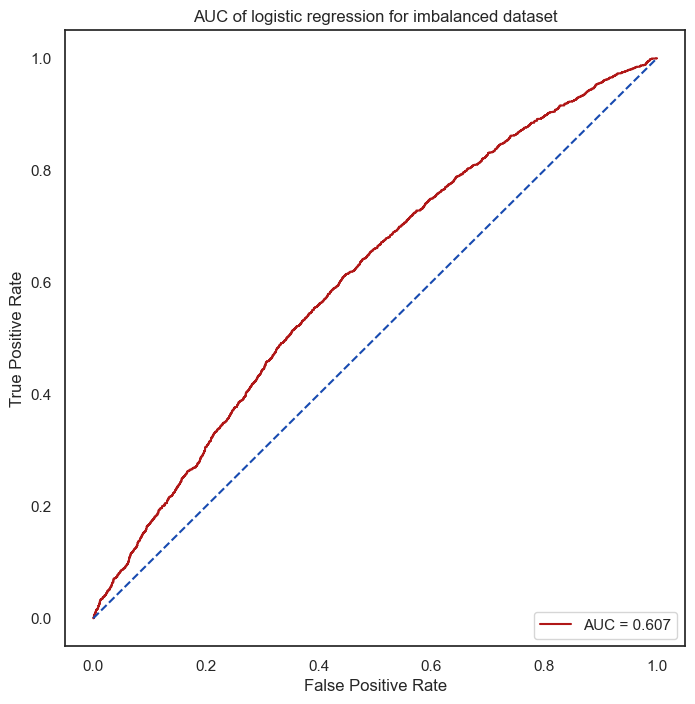

In [357]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_w, y_prob_w)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of logistic regression for imbalanced dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Trained model on Oversampled dataset

In [260]:
lg_o = LogisticRegression(random_state = 22)
lg_o.fit(X_train_o, y_train_o)

LogisticRegression(random_state=24)

In [261]:
lg_o.score(X_test_o, y_test_o)

0.6245349091704968

In [262]:
y_pred_o = lg_o.predict(X_test_o)
y_prob_o = lg_o.predict_proba(X_test_o)[:,1]

In [263]:
# Metrics
logistic_results.iloc[0, 1] = round(roc_auc_score(y_test_o, y_prob_o), 3)
logistic_results.iloc[1, 1] = round(precision_score(y_test_o, y_pred_o), 2)
logistic_results.iloc[2, 1] = round(recall_score(y_test_o, y_pred_o), 2)
logistic_results.iloc[3, 1] = round(f1_score(y_test_o, y_pred_o), 2)
lg_o_cm = confusion_matrix(y_test_o, y_pred_o)

In [264]:
print(classification_report(y_test_o, y_pred_o))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57      4569
           1       0.60      0.76      0.67      4569

    accuracy                           0.62      9138
   macro avg       0.63      0.62      0.62      9138
weighted avg       0.63      0.62      0.62      9138



In [265]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_o, y_prob_o), 3)}')

ROC AUC score: 0.662


In [266]:
roc_auc = round(cross_val_score(lg_o, X_oversampled, y_oversampled, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(lg_o, X_oversampled, y_oversampled, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(lg_o, X_oversampled, y_oversampled, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(lg_o, X_oversampled, y_oversampled, cv = 5, scoring = 'f1').mean(), 2)

In [267]:
logistic_results_cv.iloc[0, 1] = roc_auc
logistic_results_cv.iloc[1, 1] = precision
logistic_results_cv.iloc[2, 1] = recall
logistic_results_cv.iloc[3, 1] = f1score

In [268]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.664
precision: 0.6
recall: 0.75
f1: 0.67


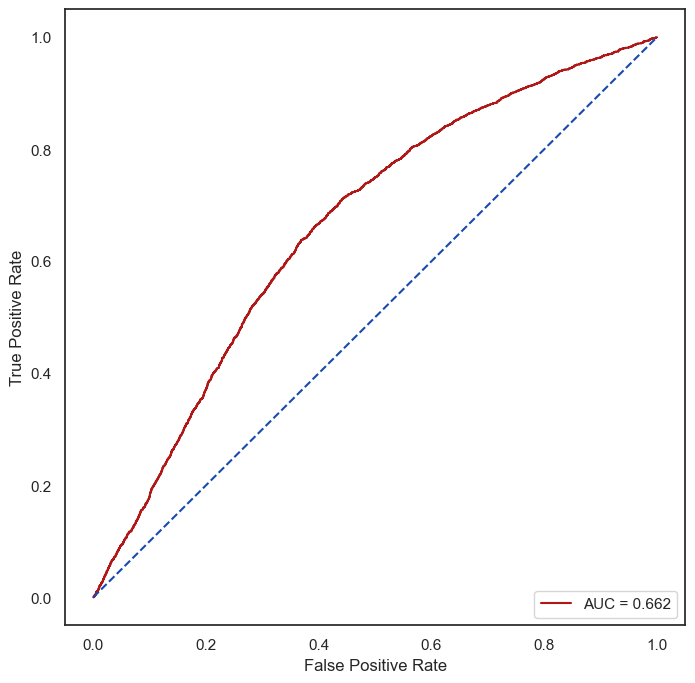

In [269]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_o, y_prob_o)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of logistic regression for oversampling dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Trained model on Undersampled dataset

In [270]:
lg_u = LogisticRegression(random_state = 22)
lg_u.fit(X_train_u, y_train_u)

LogisticRegression(random_state=23)

In [271]:
lg_u.score(X_test_u, y_test_u)

0.6343374969385256

In [272]:
y_pred_u = lg_u.predict(X_test_u)
y_prob_u = lg_u.predict_proba(X_test_u)[:,1]

In [273]:
# Metrics
logistic_results.iloc[0, 2] = round(roc_auc_score(y_test_u, y_prob_u), 3)
logistic_results.iloc[1, 2] = round(precision_score(y_test_u, y_pred_u), 2)
logistic_results.iloc[2, 2] = round(recall_score(y_test_u, y_pred_u), 2)
logistic_results.iloc[3, 2] = round(f1_score(y_test_u, y_pred_u), 2)
lg_u_cm = confusion_matrix(y_test_u, y_pred_u)

In [274]:
print(classification_report(y_test_u, y_pred_u))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59      2042
           1       0.61      0.75      0.67      2041

    accuracy                           0.63      4083
   macro avg       0.64      0.63      0.63      4083
weighted avg       0.64      0.63      0.63      4083



In [275]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_u, y_prob_u), 3)}')

ROC AUC score: 0.69


In [276]:
roc_auc = round(cross_val_score(lg_u, X_undersample, y_undersample, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(lg_u, X_undersample, y_undersample, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(lg_u, X_undersample, y_undersample, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(lg_u, X_undersample, y_undersample, cv = 5, scoring = 'f1').mean(), 2)

In [277]:
logistic_results_cv.iloc[0, 2] = roc_auc
logistic_results_cv.iloc[1, 2] = precision
logistic_results_cv.iloc[2, 2] = recall
logistic_results_cv.iloc[3, 2] = f1score

In [278]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.661
precision: 0.59
recall: 0.74
f1: 0.66


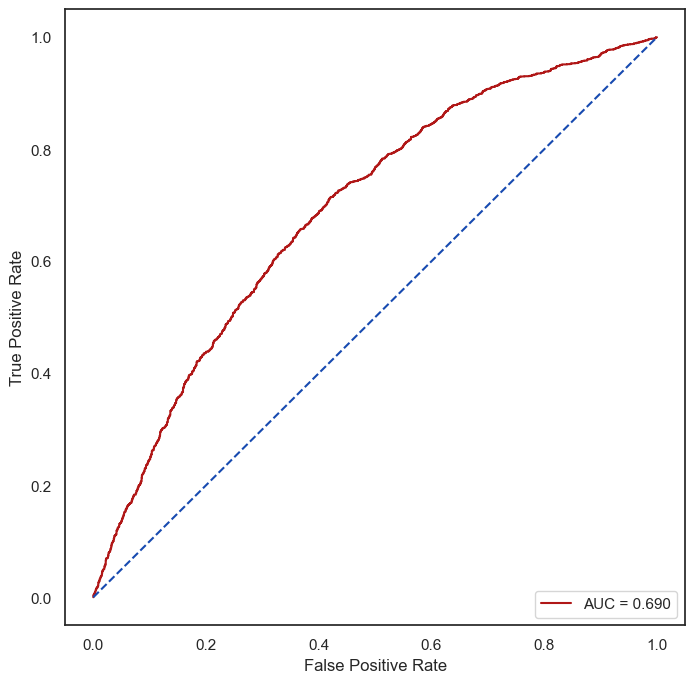

In [279]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_u, y_prob_u)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of logistic regression for undersampling dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Compare the performance of logistic regression of imbalance, oversample and undersample dataset

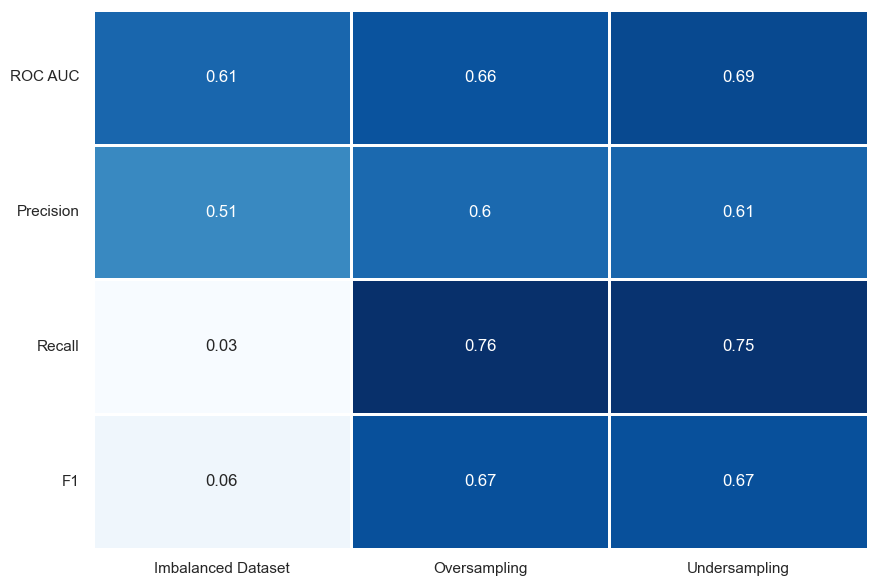

In [280]:
plt.figure(figsize = (10, 7))
sns.heatmap(logistic_results[logistic_results.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['ROC AUC','Precision', 'Recall', 'F1'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.title('Performance of logistic regression')
plt.show()

##### Cross validation performance

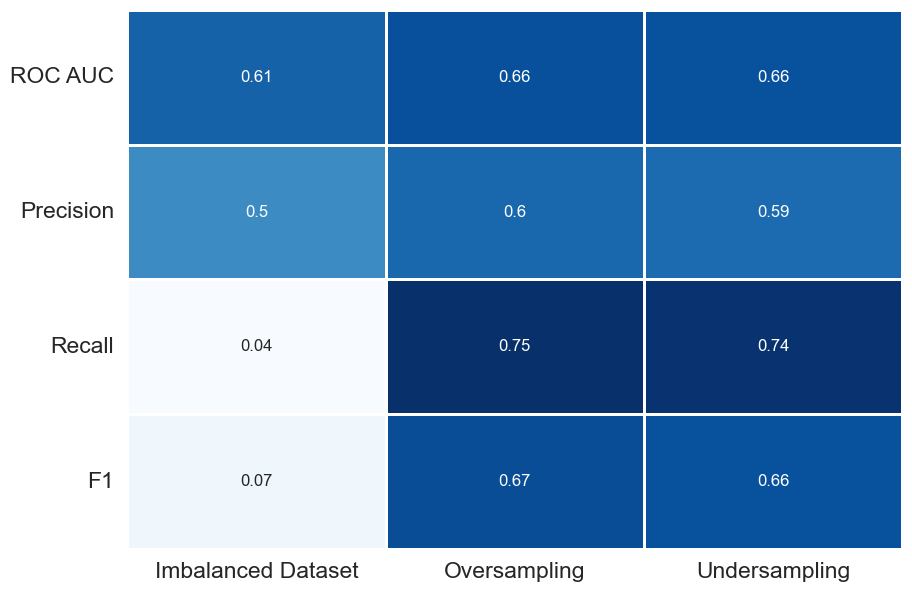

In [281]:
plt.figure(figsize = (10, 7))
sns.heatmap(logistic_results_cv[logistic_results_cv.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['ROC AUC','Precision', 'Recall', 'F1'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.title('Performance of logistic regression on 5 fold cross validation')
plt.show()

#### Trained model on Stadardize dataset

In [282]:
logistic_results = pd.DataFrame(columns = ['Imbalanced Dataset', 'Oversampling', 'Undersampling'], index = range(4))
logistic_results_cv = pd.DataFrame(columns = ['Imbalanced Dataset', 'Oversampling', 'Undersampling'], index = range(4))

##### Train model on standardize dataset which is imbalanced

In [372]:
lg_w_s = LogisticRegression(random_state = 22)
lg_w_s.fit(X_train_w_s, y_train_w_s)

LogisticRegression(random_state=22)

In [373]:
lg_w_s.score(X_test_w_s, y_test_w_s)

0.7291981845688351

In [374]:
y_pred_w_s = lg_w_s.predict(X_test_w_s)
y_prob_w_s = lg_w_s.predict_proba(X_test_w_s)[:,1]

In [375]:
# Metrics
logistic_results.iloc[0, 0] = round(roc_auc_score(y_test_w_s, y_prob_w_s), 3)
logistic_results.iloc[1, 0] = round(precision_score(y_test_w_s, y_pred_w_s), 2)
logistic_results.iloc[2, 0] = round(recall_score(y_test_w_s, y_pred_w_s), 2)
logistic_results.iloc[3, 0] = round(f1_score(y_test_w_s, y_pred_w_s), 2)

lg_w_s_cm = confusion_matrix(y_test_w_s, y_pred_w_s)

In [287]:
print(classification_report(y_test_w_s, y_pred_w_s))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82      4569
           1       0.62      0.31      0.41      2041

    accuracy                           0.73      6610
   macro avg       0.69      0.61      0.62      6610
weighted avg       0.71      0.73      0.70      6610



In [288]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_w_s, y_prob_w_s), 3)}')

ROC AUC score: 0.74


In [289]:
roc_auc = round(cross_val_score(lg_w_s, X_whole_standard, y_whole_standard, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(lg_w_s, X_whole_standard, y_whole_standard, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(lg_w_s, X_whole_standard, y_whole_standard, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(lg_w_s, X_whole_standard, y_whole_standard, cv = 5, scoring = 'f1').mean(), 2)

In [290]:
logistic_results_cv.iloc[0, 0] = roc_auc
logistic_results_cv.iloc[1, 0] = precision
logistic_results_cv.iloc[2, 0] = recall
logistic_results_cv.iloc[3, 0] = f1score

In [291]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.741
precision: 0.63
recall: 0.31
f1: 0.41


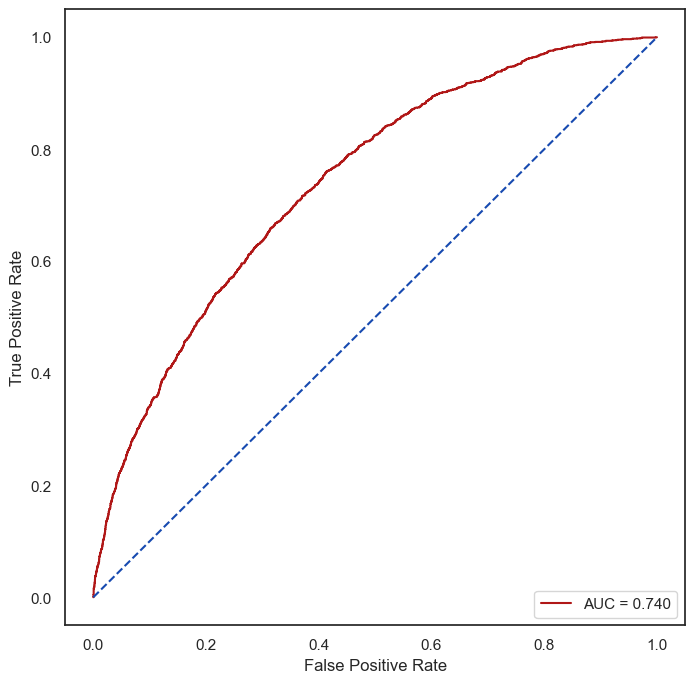

In [292]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_w_s, y_prob_w_s)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of logistic regression for imbalanced dataset')plt.title('AUC of logistic regression for standardize imbalanced dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Trained model on Oversampled dataset

In [293]:
lg_o_s = LogisticRegression(random_state = 22)
lg_o_s.fit(X_train_o_s, y_train_o_s)

LogisticRegression(random_state=24)

In [294]:
lg_o_s.score(X_test_o_s, y_test_o_s)

0.6805646749835851

In [295]:
y_pred_o_s = lg_o_s.predict(X_test_o_s)
y_prob_o_s = lg_o.predict_proba(X_test_o_s)[:,1]

In [296]:
# Metrics
logistic_results.iloc[0, 1] = round(roc_auc_score(y_test_o_s, y_prob_o_s), 3)
logistic_results.iloc[1, 1] = round(precision_score(y_test_o_s, y_pred_o_s), 2)
logistic_results.iloc[2, 1] = round(recall_score(y_test_o_s, y_pred_o_s), 2)
logistic_results.iloc[3, 1] = round(f1_score(y_test_o_s, y_pred_o_s), 2)
lg_o_s_cm = confusion_matrix(y_test_o_s, y_pred_o_s)

In [297]:
print(classification_report(y_test_o_s, y_pred_o_s))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      4569
           1       0.68      0.69      0.68      4569

    accuracy                           0.68      9138
   macro avg       0.68      0.68      0.68      9138
weighted avg       0.68      0.68      0.68      9138



In [298]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_o_s, y_prob_o_s), 3)}')

ROC AUC score: 0.617


In [299]:
roc_auc = round(cross_val_score(lg_o_s, X_oversampled_standard, y_oversampled_standard, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(lg_o_s, X_oversampled_standard, y_oversampled_standard, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(lg_o_s, X_oversampled_standard, y_oversampled_standard, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(lg_o_s, X_oversampled_standard, y_oversampled_standard, cv = 5, scoring = 'f1').mean(), 2)

In [300]:
logistic_results_cv.iloc[0, 1] = roc_auc
logistic_results_cv.iloc[1, 1] = precision
logistic_results_cv.iloc[2, 1] = recall
logistic_results_cv.iloc[3, 1] = f1score

In [301]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.749
precision: 0.68
recall: 0.69
f1: 0.68


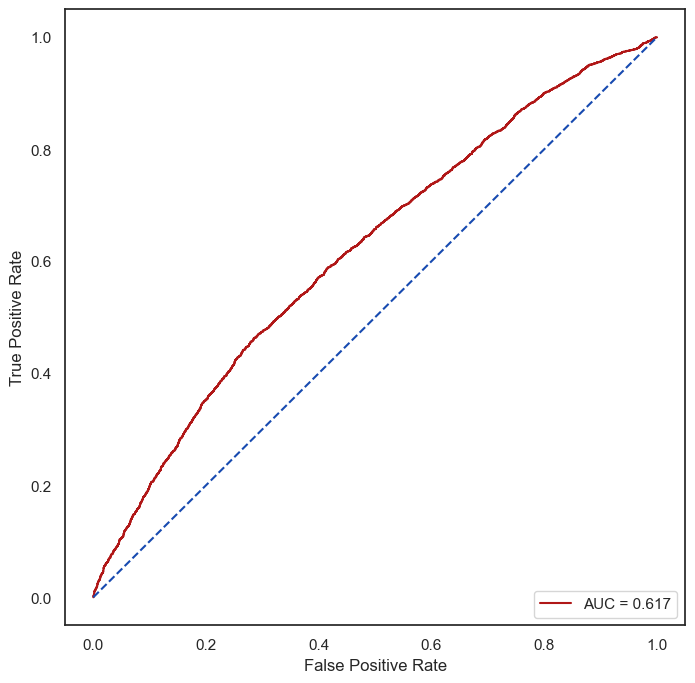

In [302]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_o_s, y_prob_o_s)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of logistic regression for imbalanced dataset')plt.title('AUC of logistic regression for standardize oversampling dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Trained model on Undersampled dataset

In [303]:
lg_u_s = LogisticRegression(random_state = 22)
lg_u_s.fit(X_train_u_s, y_train_u_s)

LogisticRegression(random_state=23)

In [304]:
lg_u_s.score(X_test_u_s, y_test_u_s)

0.67425912319373

In [305]:
y_pred_u_s = lg_u_s.predict(X_test_u_s)
y_prob_u_s = lg_u_s.predict_proba(X_test_u_s)[:,1]

In [306]:
# Metrics
logistic_results.iloc[0, 2] = round(roc_auc_score(y_test_u_s, y_prob_u_s), 3)
logistic_results.iloc[1, 2] = round(precision_score(y_test_u_s, y_pred_u_s), 2)
logistic_results.iloc[2, 2] = round(recall_score(y_test_u_s, y_pred_u_s), 2)
logistic_results.iloc[3, 2] = round(f1_score(y_test_u_s, y_pred_u_s), 2)
lg_u_s_cm = confusion_matrix(y_test_u_s, y_pred_u_s)

In [307]:
print(classification_report(y_test_u_s, y_pred_u_s))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2042
           1       0.67      0.68      0.67      2041

    accuracy                           0.67      4083
   macro avg       0.67      0.67      0.67      4083
weighted avg       0.67      0.67      0.67      4083



In [308]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_u_s, y_prob_u_s), 3)}')

ROC AUC score: 0.749


In [309]:
roc_auc = round(cross_val_score(lg_u_s, X_undersample_standard, y_undersample_standard, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(lg_u_s, X_undersample_standard, y_undersample_standard, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(lg_u_s, X_undersample_standard, y_undersample_standard, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(lg_u_s, X_undersample_standard, y_undersample_standard, cv = 5, scoring = 'f1').mean(), 2)

In [310]:
logistic_results_cv.iloc[0, 2] = roc_auc
logistic_results_cv.iloc[1, 2] = precision
logistic_results_cv.iloc[2, 2] = recall
logistic_results_cv.iloc[3, 2] = f1score

In [311]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.744
precision: 0.67
recall: 0.67
f1: 0.67


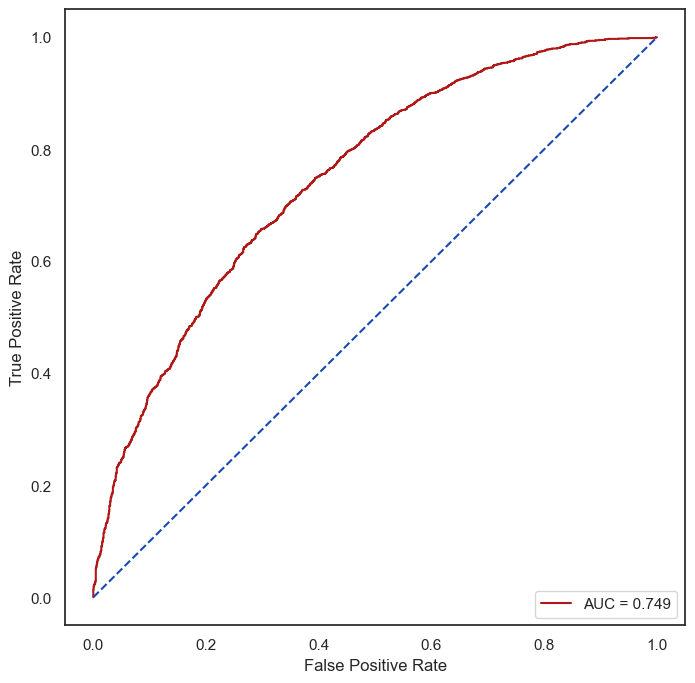

In [312]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_u_s, y_prob_u_s)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of logistic regression for imbalanced dataset')plt.title('AUC of logistic regression for standardize undersampling dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Compare the performance of logistic regression on standardize dataset of imbalance, oversample and undersample dataset

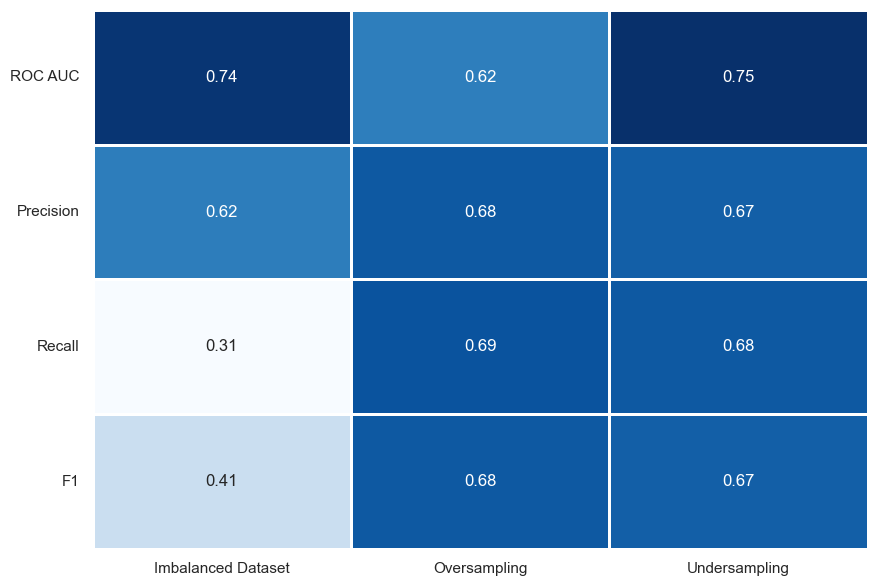

In [313]:
plt.figure(figsize = (10, 7))
sns.heatmap(logistic_results[logistic_results.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['ROC AUC','Precision', 'Recall', 'F1'])
sns.set(font_scale = 1.5)
plt.title('Performance of logistic regression on standardize data')
plt.yticks(rotation = 0)
plt.show()

##### Cross validation performance on standardize dataset

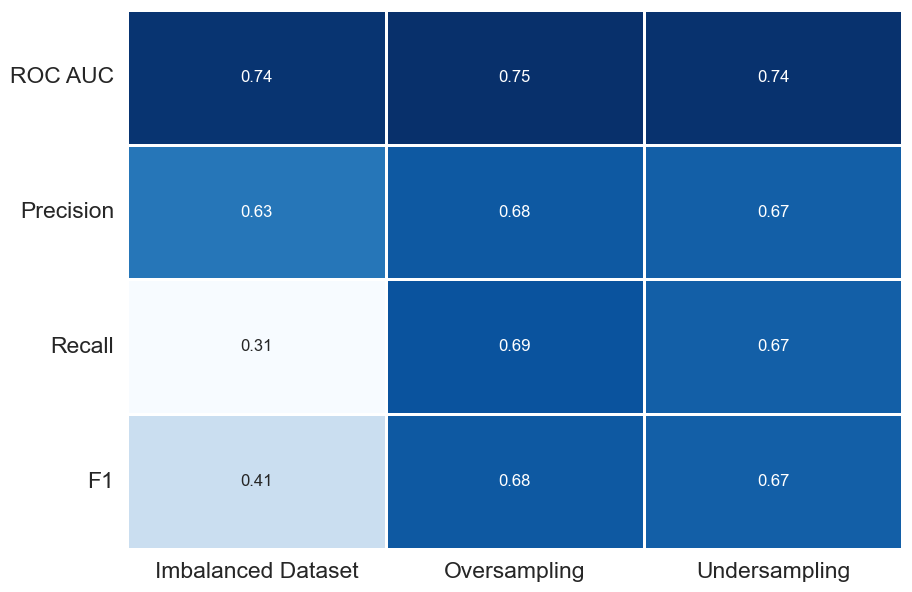

In [314]:
plt.figure(figsize = (10, 7))
sns.heatmap(logistic_results_cv[logistic_results_cv.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['ROC AUC','Precision', 'Recall', 'F1'])
sns.set(font_scale = 1.5)
plt.title('Performance of 5 fold cross validation of logistic regression on standardize data')
plt.yticks(rotation = 0)
plt.show()

#### Random Forest Classifier Algoritham

In [315]:
randomforest_results = pd.DataFrame(columns = ['Imbalanced Dataset', 'Oversampling', 'Undersampling'], index = range(4))
randomforest_results_cv = pd.DataFrame(columns = ['Imbalanced Dataset', 'Oversampling', 'Undersampling'], index = range(4))

##### Trained model on Imbalanced dataset

In [316]:
rf_w = RandomForestClassifier(random_state = 22)
rf_w.fit(X_train_w, y_train_w)

RandomForestClassifier(random_state=22)

In [317]:
rf_w.score(X_test_w, y_test_w)

0.7387291981845688

In [318]:
y_pred_w = rf_w.predict(X_test_w)
y_prob_w = rf_w.predict_proba(X_test_w)[:,1]

In [319]:
# Metrics
randomforest_results.iloc[0, 0] = round(precision_score(y_test_w, y_pred_w), 2)
randomforest_results.iloc[1, 0] = round(recall_score(y_test_w, y_pred_w), 2)
randomforest_results.iloc[2, 0] = round(f1_score(y_test_w, y_pred_w), 2)
randomforest_results.iloc[3, 0] = round(roc_auc_score(y_test_w, y_prob_w), 3)
rf_w_cm = confusion_matrix(y_test_w, y_pred_w)

In [320]:
print(classification_report(y_test_w, y_pred_w))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      4569
           1       0.65      0.33      0.44      2041

    accuracy                           0.74      6610
   macro avg       0.70      0.62      0.63      6610
weighted avg       0.72      0.74      0.71      6610



In [321]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_w, y_prob_w), 3)}')

ROC AUC score: 0.758


In [322]:
roc_auc = round(cross_val_score(rf_w, X_whole, y_whole, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(rf_w, X_whole, y_whole, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(rf_w, X_whole, y_whole, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(rf_w, X_whole, y_whole, cv = 5, scoring = 'f1').mean(), 2)

In [323]:
randomforest_results_cv.iloc[0, 0] = roc_auc
randomforest_results_cv.iloc[1, 0] = precision
randomforest_results_cv.iloc[2, 0] = recall
randomforest_results_cv.iloc[3, 0] = f1score

In [324]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.757
precision: 0.67
recall: 0.33
f1: 0.44


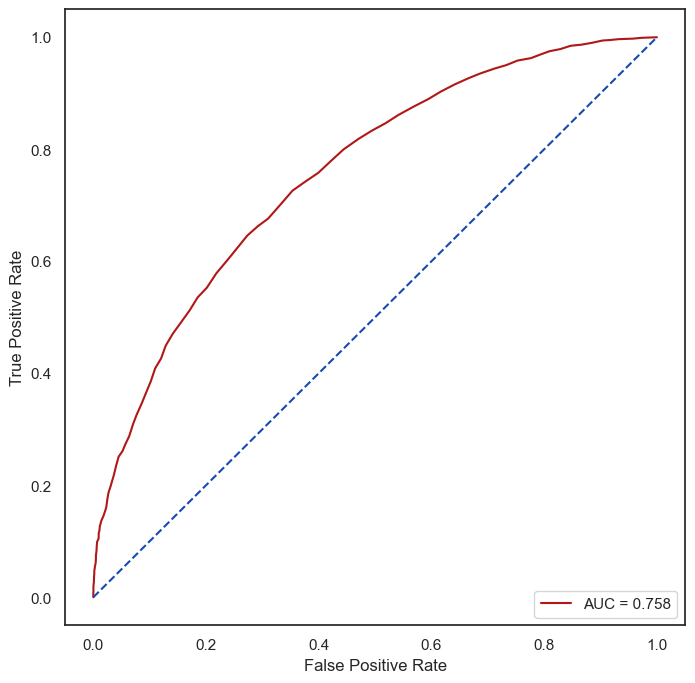

In [325]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_w, y_prob_w)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of random forest for imbalanced dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Trained model on Oversampled dataset

In [326]:
rf_o = RandomForestClassifier(random_state = 22)
rf_o.fit(X_train_o, y_train_o)

RandomForestClassifier(random_state=23)

In [327]:
rf_o.score(X_test_o, y_test_o)

0.8220617202889035

In [328]:
y_pred_o = rf_o.predict(X_test_o)
y_prob_o = rf_o.predict_proba(X_test_o)[:,1]

In [329]:
# Metrics
randomforest_results.iloc[0, 1] = round(precision_score(y_test_o, y_pred_o), 2)
randomforest_results.iloc[1, 1] = round(recall_score(y_test_o, y_pred_o), 2)
randomforest_results.iloc[2, 1] = round(f1_score(y_test_o, y_pred_o), 2)
randomforest_results.iloc[3, 1] = round(roc_auc_score(y_test_o, y_prob_o), 3)
rf_o_cm = confusion_matrix(y_test_o, y_pred_o)

In [330]:
print(classification_report(y_test_o, y_pred_o))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4569
           1       0.85      0.79      0.82      4569

    accuracy                           0.82      9138
   macro avg       0.82      0.82      0.82      9138
weighted avg       0.82      0.82      0.82      9138



In [331]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_o, y_prob_o), 3)}')

ROC AUC score: 0.901


In [332]:
roc_auc = round(cross_val_score(rf_o, X_oversampled, y_oversampled, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(rf_o, X_oversampled, y_oversampled, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(rf_o, X_oversampled, y_oversampled, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(rf_o, X_oversampled, y_oversampled, cv = 5, scoring = 'f1').mean(), 2)

In [333]:
randomforest_results_cv.iloc[0, 1] = roc_auc
randomforest_results_cv.iloc[1, 1] = precision
randomforest_results_cv.iloc[2, 1] = recall
randomforest_results_cv.iloc[3, 1] = f1score

In [334]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.896
precision: 0.83
recall: 0.74
f1: 0.76


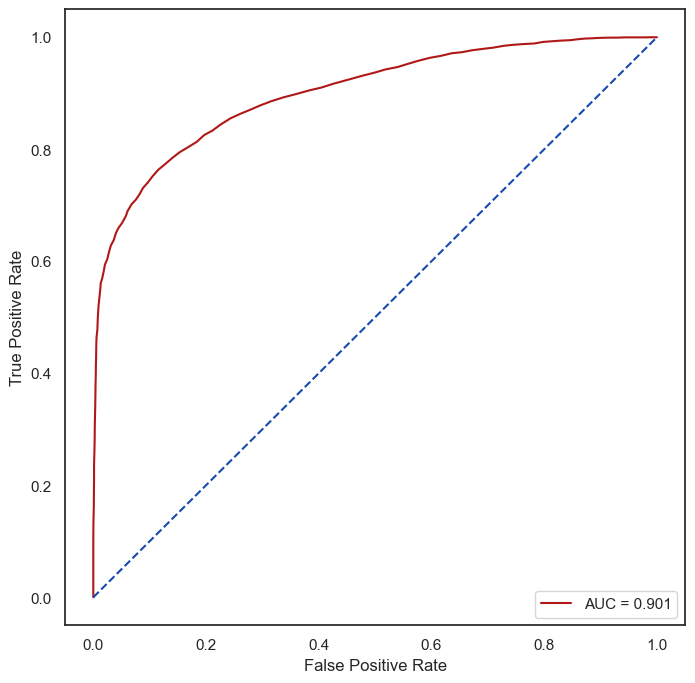

In [335]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_o, y_prob_o)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.title('AUC of random forest for oversampled dataset')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Trained model on Undersampled dataset

In [336]:
rf_u = RandomForestClassifier(random_state = 22)
rf_u.fit(X_train_u, y_train_u)

RandomForestClassifier(random_state=23)

In [337]:
rf_u.score(X_test_u, y_test_u)

0.692138133725202

In [338]:
y_pred_u = rf_u.predict(X_test_u)
y_prob_u = rf_u.predict_proba(X_test_u)[:,1]

In [339]:
# Metrics
randomforest_results.iloc[0, 2] = round(precision_score(y_test_u, y_pred_u), 2)
randomforest_results.iloc[1, 2] = round(recall_score(y_test_u, y_pred_u), 2)
randomforest_results.iloc[2, 2] = round(f1_score(y_test_u, y_pred_u), 2)
randomforest_results.iloc[3, 2] = round(roc_auc_score(y_test_u, y_prob_u), 3)
rf_u_cm = confusion_matrix(y_test_u, y_pred_u)

In [340]:
print(classification_report(y_test_u, y_pred_u))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2042
           1       0.69      0.70      0.69      2041

    accuracy                           0.69      4083
   macro avg       0.69      0.69      0.69      4083
weighted avg       0.69      0.69      0.69      4083



In [341]:
print(f'ROC AUC score: {round(roc_auc_score(y_test_u, y_prob_u), 3)}')

ROC AUC score: 0.761


In [342]:
roc_auc = round(cross_val_score(rf_u, X_undersample, y_undersample, cv = 5, scoring = 'roc_auc').mean(), 3)
precision = round(cross_val_score(rf_u, X_undersample, y_undersample, cv = 5, scoring = 'precision').mean(), 2)
recall = round(cross_val_score(rf_u, X_undersample, y_undersample, cv = 5, scoring = 'recall').mean(), 2)
f1score = round(cross_val_score(rf_u, X_undersample, y_undersample, cv = 5, scoring = 'f1').mean(), 2)

In [343]:
randomforest_results_cv.iloc[0, 2] = roc_auc
randomforest_results_cv.iloc[1, 2] = precision
randomforest_results_cv.iloc[2, 2] = recall
randomforest_results_cv.iloc[3, 2] = f1score

In [344]:
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {roc_auc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1score}")

Cross-validation scores with 5 folds:

ROC AUC: 0.76
precision: 0.68
recall: 0.69
f1: 0.69


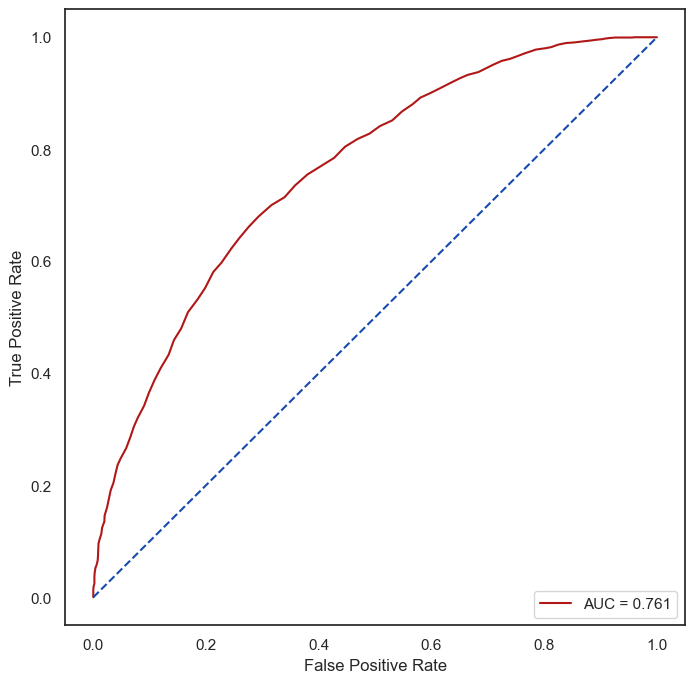

In [345]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_u, y_prob_u)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.title('AUC of random forest for undersampled dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Compare the performance of Random Forest for imbalance, oversample and undersample dataset

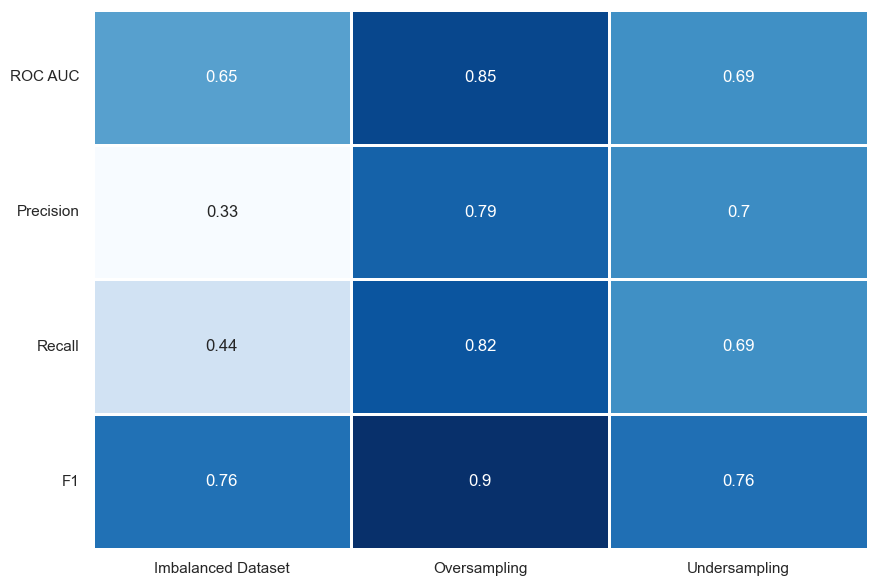

In [346]:
plt.figure(figsize = (10, 7))
sns.heatmap(randomforest_results[randomforest_results.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['ROC AUC','Precision', 'Recall', 'F1'])
sns.set(font_scale = 1.5)
plt.title('Performance of random forest')
plt.yticks(rotation = 0)
plt.show()

#### Cross validation performance

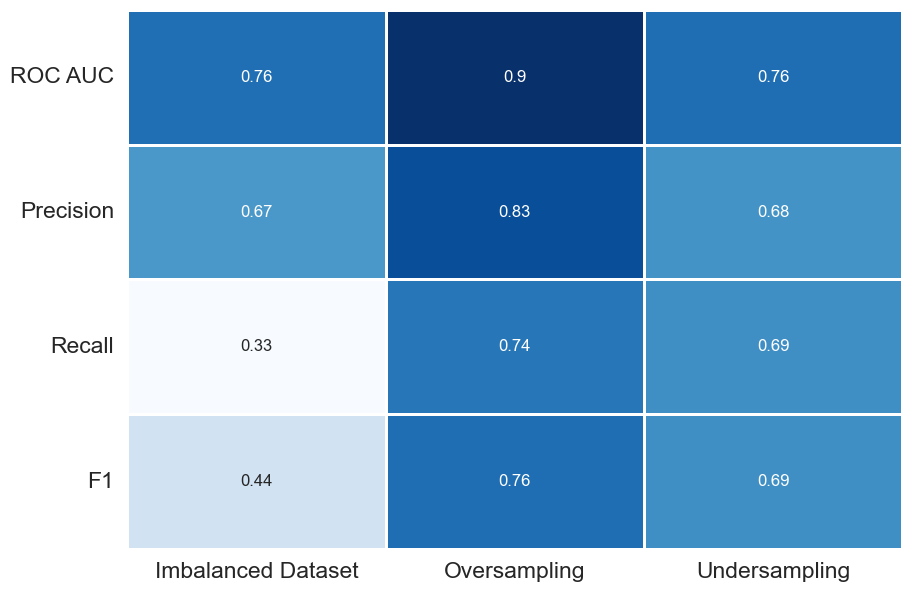

In [347]:
plt.figure(figsize = (10, 7))
sns.heatmap(randomforest_results_cv[randomforest_results_cv.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['ROC AUC','Precision', 'Recall', 'F1'])
sns.set(font_scale = 1.5)
plt.title('Performance of 5 fold cross validation on random forest')
plt.yticks(rotation = 0)
plt.show()

### Stored the trained model

In [359]:
# define model name and trained model name for stroing in pickle file
model_name = ['logistc_imbalance','logistic_oversampled', 'logistic_undersampled', 'logistic_standard_imbalance', 'logistic_standard_oversampled','logistic_standard_undersampled', 'rf_imbalance', 'rf_oversampled', 'rf_undersampled']
trained_model = [lg_w, lg_o, lg_u, lg_w_s, lg_o_s, lg_u_s, rf_w, rf_o, rf_u]

In [361]:
# Create a dictionary to store models with names
models_dict = dict(zip(model_name, trained_model))

# Define a directory where you want to save the models
model_dir = 'Models/'

In [363]:
# Iterate over the models and save them using pickle
for name, model in models_dict.items():
    with open(model_dir + name + '.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)

### Make prediction on test file using random forest oversampling dataset

In [387]:
# load test file and pre process it
testing_data = pd.read_csv("DS Test/Test/X_test.csv")

In [388]:
# checking info of testing_data
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  11017 non-null  object 
 1   C1         11017 non-null  int64  
 2   C2         11017 non-null  int64  
 3   C3         11017 non-null  int64  
 4   C4         11017 non-null  int64  
 5   C5         11017 non-null  int64  
 6   C6         11017 non-null  bool   
 7   C7         11017 non-null  int64  
 8   C8         11017 non-null  bool   
 9   N1         11017 non-null  float64
 10  N2         9528 non-null   float64
 11  N3         10905 non-null  float64
 12  N4         9529 non-null   float64
 13  N5         9529 non-null   float64
 14  N6         10905 non-null  float64
 15  N7         10888 non-null  float64
 16  N8         11017 non-null  int64  
 17  N9         11017 non-null  int64  
 18  N10        10888 non-null  float64
 19  N10.1      10888 non-null  float64
 20  N11   

#### Check null values and handle for test data

In [452]:
# remove the column that we removed from training data
testing_filtered = testing_data.drop(columns=columns_with_more_than_80_per_null_values.index)

In [455]:
# Calculate the percentage of null values for each column
null_percentage  = testing_filtered.isna().sum().sort_values(ascending=False) / testing_filtered.shape[0] * 100

# Filter columns where the null percentage is greater than 5%
columns_with_high_nulls = null_percentage[null_percentage > 0.01]

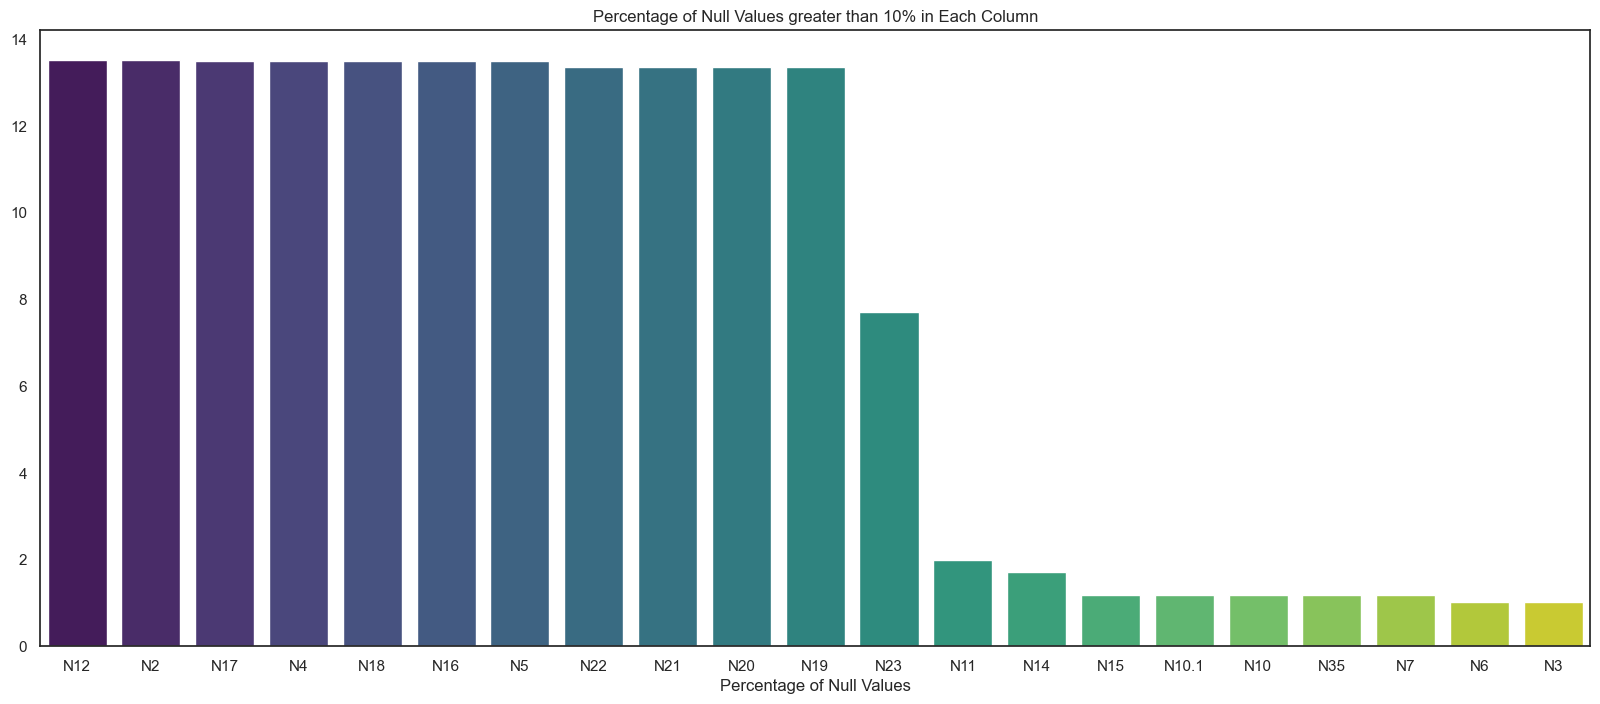

In [456]:
# Create a bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x=columns_with_high_nulls.index, y=columns_with_high_nulls, palette='viridis', orient='v')
plt.xlabel('Percentage of Null Values')
plt.title('Percentage of Null Values greater than 10% in Each Column')
plt.show()

#### fill na values with median and mode for test data

In [459]:
categorical_columns, numerical_columns.columns

(['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C5', 'C7'],
 Index(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1',
        'N11', 'N12', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21',
        'N22', 'N23', 'N24', 'N33', 'N34', 'N35'],
       dtype='object'))

In [460]:
for column in numerical_columns.columns:
    median_value = median_values.get(column)  # Get the median value for the current column
    if median_value is not None:  # Check if a median value exists for this column
        testing_filtered[column].fillna(median_value, inplace=True)

In [461]:
# Fill missing values in categorical columns using mode values from training data
for column in categorical_columns:
    mode_value = mode_values.get(column)  # Get the mode value for the current column
    if mode_value is not None:  # Check if a mode value exists for this column
        testing_filtered[column].fillna(mode_value, inplace=True)

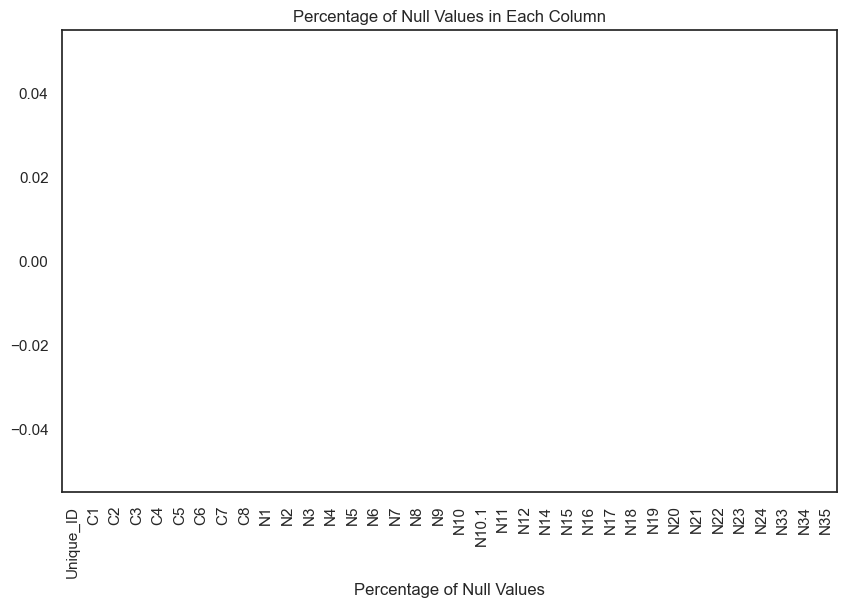

In [464]:
# Calculate the percentage of null values for each column
null_percentage = (testing_filtered.isnull().sum() / len(testing_filtered)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette='viridis')
plt.xlabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Check distribution of test dataset

In [465]:
# Create a list of numerical column names
numerical_columns = testing_filtered.select_dtypes(include='number').columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16',
       'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N33', 'N34',
       'N35'],
      dtype='object')

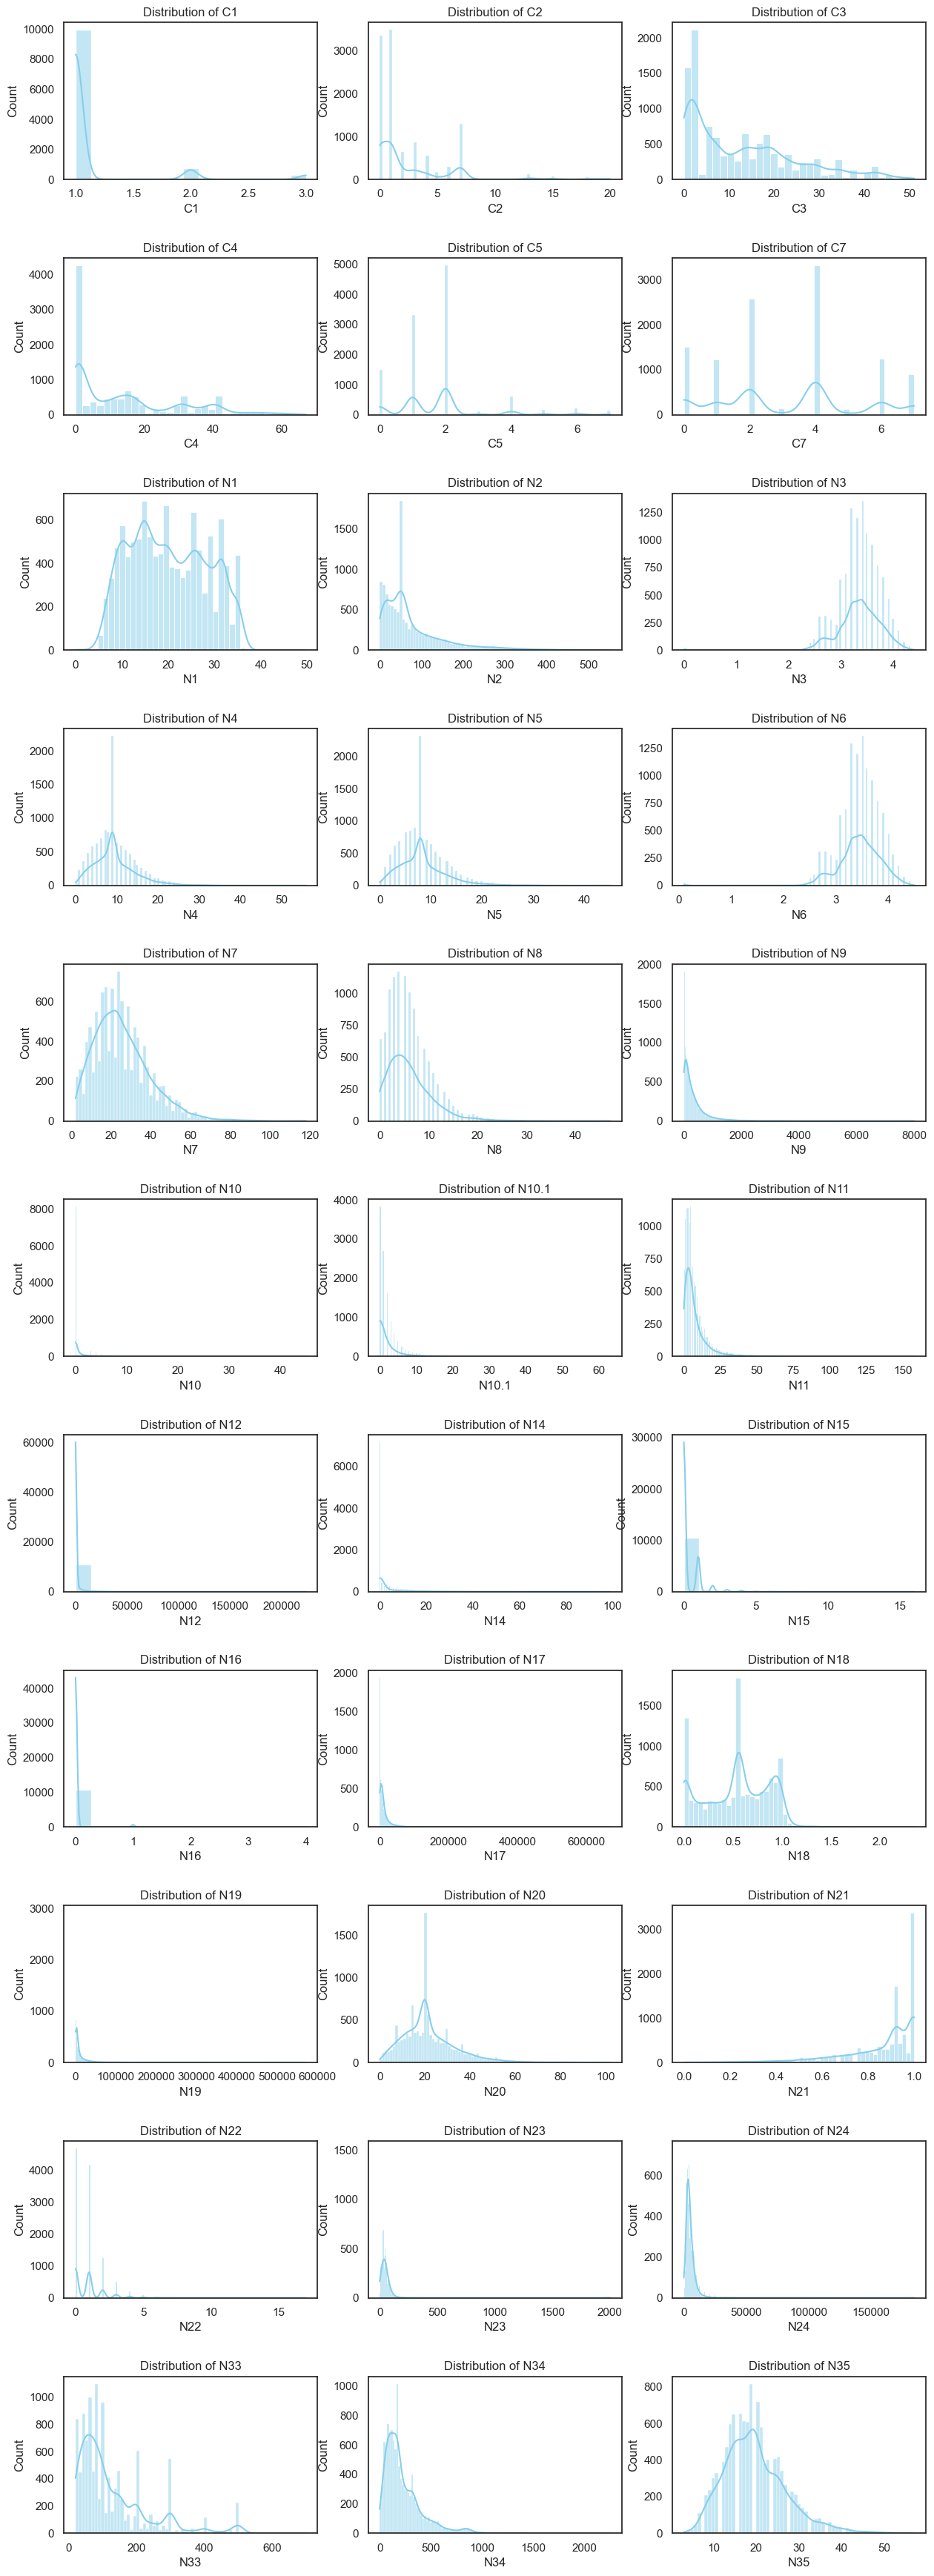

In [466]:
# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3  # Set the number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    
    # Create histogram with KDE for the current numerical column
    sns.histplot(testing_filtered[column], kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)

# If there are empty subplots, remove them
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.show()

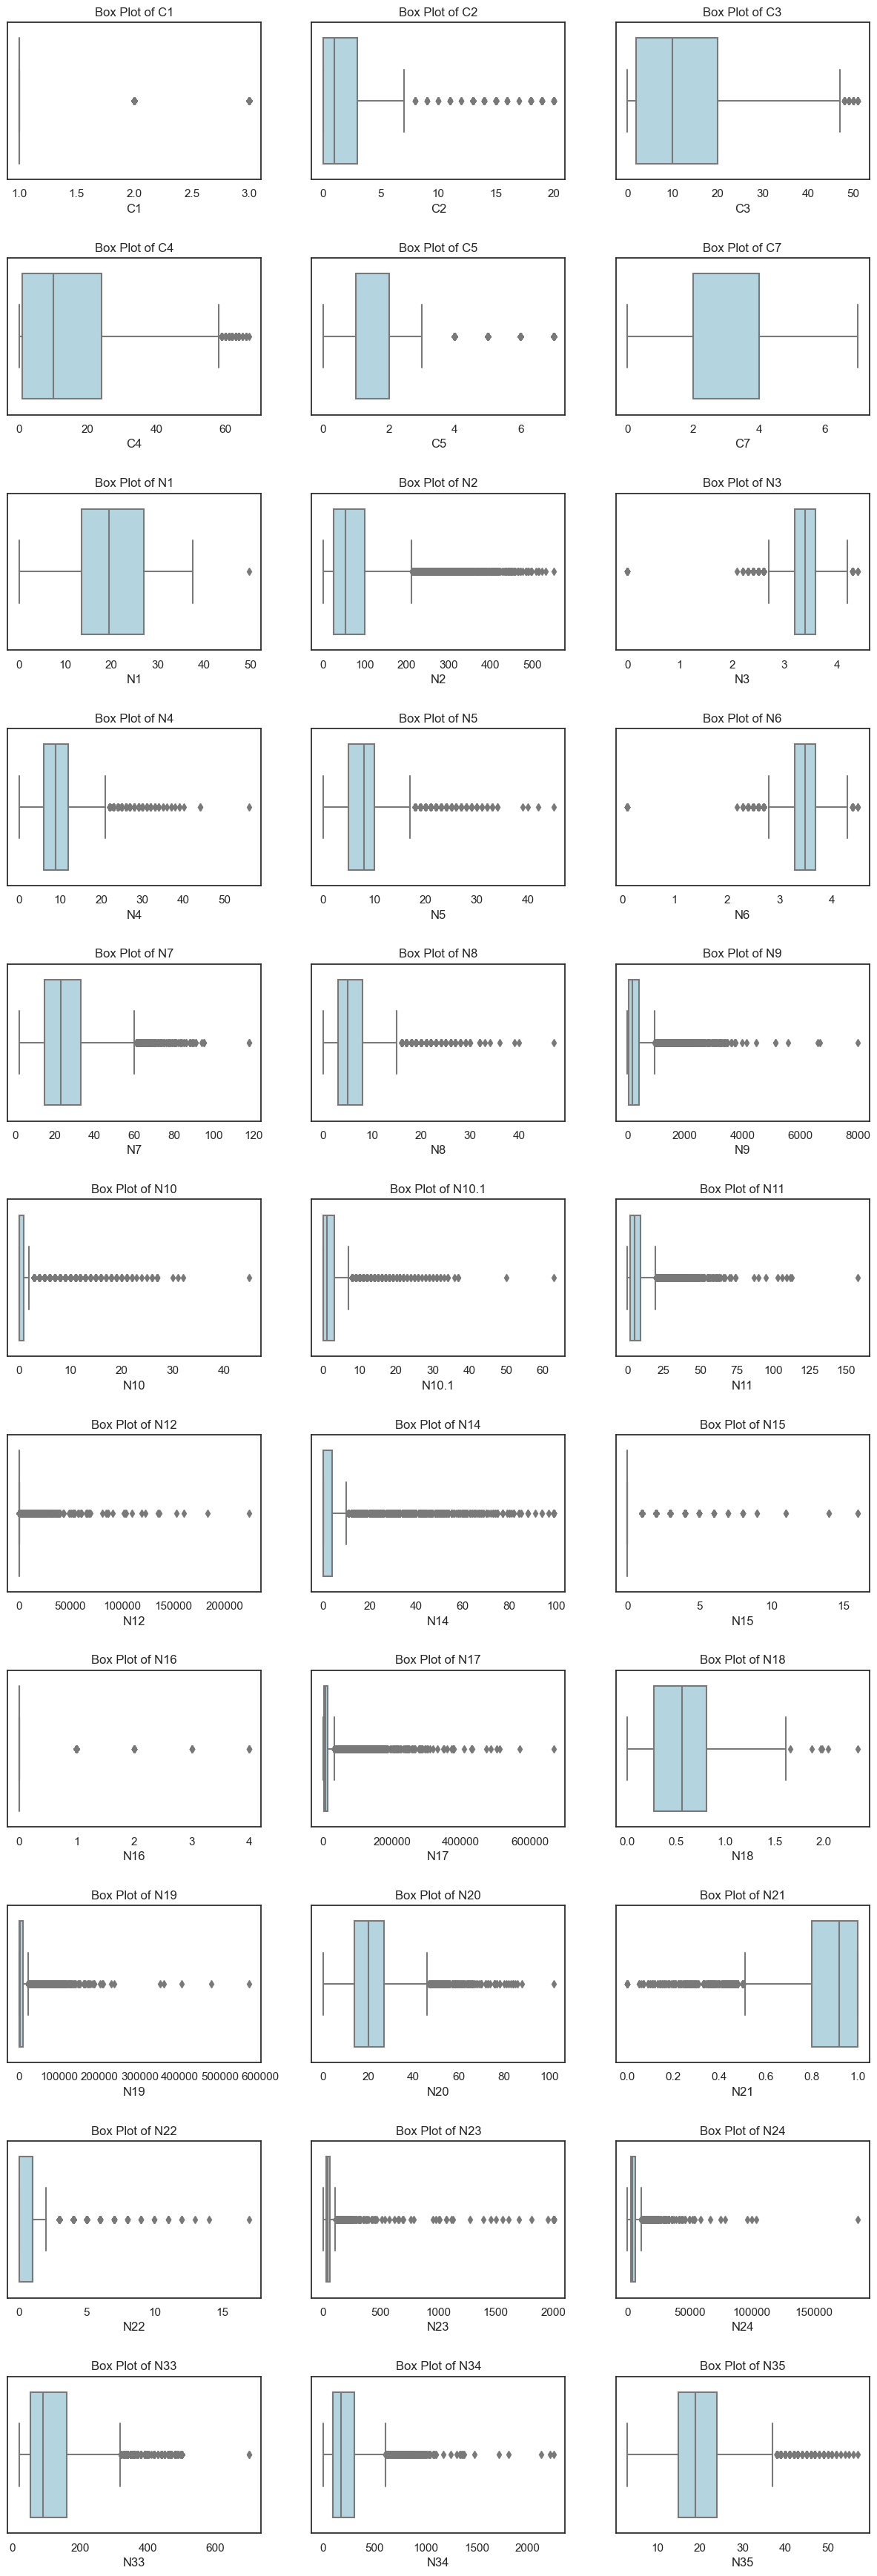

In [469]:
# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3  # Set the number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    
    # Create box plot for the current numerical column
    sns.boxplot(x=testing_filtered[column], color='lightblue', ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')
    axes[row, col].set_xlabel(column)

# If there are empty subplots, remove them
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.show()

### Handle true and false categorical column by convering into numeric format

In [471]:
testing_filtered['C6'] = testing_filtered['C6'].astype(np.int8)
testing_filtered['C8'] = testing_filtered['C8'].astype(np.int8)

In [472]:
testing_filtered.head()

Unique_ID  C1  C2  C3  C4  C5  C6  C7  C8     N1  ...   N18      N19  \
0   Candidate_1602   1   0   0  23   0   1   0   1  18.00  ...  0.56   3352.0   
1  Candidate_29650   1   0   2   4   2   1   2   1  16.75  ...  0.83  12165.0   
2  Candidate_31061   1   2   3  38   1   0   4   1  29.99  ...  0.79    504.0   
3   Candidate_5768   1   1  28  20   2   0   2   1  17.70  ...  0.84   1428.0   
4  Candidate_27059   1   1  15   1   3   0   5   0  28.00  ...  0.64   6324.0   

    N20   N21  N22   N23          N24    N33     N34   N35  
0  20.0  0.92  1.0  66.0  3333.333333   50.0   90.38  23.0  
1  19.0  0.94  2.0  36.0  5779.833333  300.0  532.93  16.0  
2  34.0  0.70  2.0  48.0  3083.333333   80.0  169.78  22.0  
3   9.0  0.77  0.0  36.0  5117.083333  150.0  270.02  13.0  
4  25.0  0.92  2.0  40.0     0.000000   50.0  103.41  14.0  

[5 rows x 36 columns]

#### load the model

In [473]:
with open(model_dir + 'rf_oversampled.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

#### Predict the final outcome

In [481]:
final_test_file = testing_filtered.iloc[:, 1:]
final_test_file.head()

C1  C2  C3  C4  C5  C6  C7  C8     N1     N2  ...   N18      N19   N20  \
0   1   0   0  23   0   1   0   1  18.00   53.0  ...  0.56   3352.0  20.0   
1   1   0   2   4   2   1   2   1  16.75  107.0  ...  0.83  12165.0  19.0   
2   1   2   3  38   1   0   4   1  29.99   45.0  ...  0.79    504.0  34.0   
3   1   1  28  20   2   0   2   1  17.70   20.0  ...  0.84   1428.0   9.0   
4   1   1  15   1   3   0   5   0  28.00    2.0  ...  0.64   6324.0  25.0   

    N21  N22   N23          N24    N33     N34   N35  
0  0.92  1.0  66.0  3333.333333   50.0   90.38  23.0  
1  0.94  2.0  36.0  5779.833333  300.0  532.93  16.0  
2  0.70  2.0  48.0  3083.333333   80.0  169.78  22.0  
3  0.77  0.0  36.0  5117.083333  150.0  270.02  13.0  
4  0.92  2.0  40.0     0.000000   50.0  103.41  14.0  

[5 rows x 35 columns]

In [ ]:
testing_filtered.shape, final_test_file.shape

In [500]:
final_y_pred = loaded_model.predict(final_test_file)
final_y_prob = loaded_model.predict_proba(final_test_file)[:,1]

In [502]:
# Create a DataFrame with 'Unique_ID' and 'Class_1_Probability' columns
submission_prediction = pd.DataFrame({'Unique_ID': testing_filtered['Unique_ID'], 'Class_1_Probability': final_y_prob})

In [503]:
# final submission file
submission_prediction.head()

Unique_ID  Class_1_Probability
0   Candidate_1602                 0.50
1  Candidate_29650                 0.39
2  Candidate_31061                 0.38
3   Candidate_5768                 0.28
4  Candidate_27059                 0.50

In [504]:
# store file into memory
submission_prediction.to_csv('sample_submission_file.csv')